In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import entropia

In [2]:
print(pd.__version__)

1.4.4


In [3]:
carpeta="data/base_training_QQP_salida/"

## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
print(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

data/base_training_QQP_salida/entropia/resultados_entropiaZSCORE_Transponse.pickle


In [6]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [7]:
dfn

Docs  grupo      muestreo  \
0     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
1     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
2     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
3     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
4     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
...                                                 ...    ...           ...   
2173  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2174  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2175  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2176  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2177  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   

      Total  Subtotal                          E_P  \
0       109        97        entailment_entailment   
1       109         8           entailment_neutral   
2       109         4     entailment_contradiction   
3       104        16           neutral_entailment   
4       104        80              neutral_neutral   
...     ...       ...                          ...   
2173   2042      1574              neutral_neutral   
2174   2042       258        neutral_contradiction   
2175   2023       116     contradiction_entailment   
2176   2023       261        contradiction_neutral   
2177   2023      1646  contradiction_contradiction   

                                               entropia  Paraphrase  
0     [7.192, 5.374, 7.254, 7.029, 7.399, 5.492, 6.7...           0  
1     [7.186, 5.2, 8.15, 5.557, 5.322, 5.533, 7.237,...           0  
2                          [5.947, 5.098, 5.755, 6.509]           0  
3     [4.322, 6.27, 6.622, 5.622, 7.664, 6.354, 6.60...           0  
4     [5.755, 6.692, 5.322, 7.337, 6.986, 6.682, 5.3...           0  
...                                                 ...         ...  
2173  [5.053, 6.418, 7.233, 4.725, 5.596, 7.225, 6.0...           1  
2174  [6.533, 6.828, 5.522, 4.91, 6.27, 7.386, 6.6, ...           1  
2175  [6.374, 5.492, 7.021, 6.501, 6.895, 4.56, 6.35...           1  
2176  [7.462, 6.742, 5.167, 7.14, 6.17, 6.808, 8.055...           1  
2177  [6.948, 5.67, 5.585, 5.31, 7.072, 5.278, 5.278...           1  

[2178 rows x 8 columns]

In [8]:
dfn=dfn.assign(relacion=dfn["Subtotal"]/dfn["Total"])
dfn

Docs  grupo      muestreo  \
0     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
1     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
2     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
3     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
4     data/base_training_QQP_salida\pTEST_new_0.05_0...    5.0  0.csv.pickle   
...                                                 ...    ...           ...   
2173  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2174  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2175  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2176  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   
2177  data/base_training_QQP_salida\pTEST_new_1_0.cs...  100.0  0.csv.pickle   

      Total  Subtotal                          E_P  \
0       109        97        entailment_entailment   
1       109         8           entailment_neutral   
2       109         4     entailment_contradiction   
3       104        16           neutral_entailment   
4       104        80              neutral_neutral   
...     ...       ...                          ...   
2173   2042      1574              neutral_neutral   
2174   2042       258        neutral_contradiction   
2175   2023       116     contradiction_entailment   
2176   2023       261        contradiction_neutral   
2177   2023      1646  contradiction_contradiction   

                                               entropia  Paraphrase  relacion  
0     [7.192, 5.374, 7.254, 7.029, 7.399, 5.492, 6.7...           0  0.889908  
1     [7.186, 5.2, 8.15, 5.557, 5.322, 5.533, 7.237,...           0  0.073394  
2                          [5.947, 5.098, 5.755, 6.509]           0  0.036697  
3     [4.322, 6.27, 6.622, 5.622, 7.664, 6.354, 6.60...           0  0.153846  
4     [5.755, 6.692, 5.322, 7.337, 6.986, 6.682, 5.3...           0  0.769231  
...                                                 ...         ...       ...  
2173  [5.053, 6.418, 7.233, 4.725, 5.596, 7.225, 6.0...           1  0.770813  
2174  [6.533, 6.828, 5.522, 4.91, 6.27, 7.386, 6.6, ...           1  0.126347  
2175  [6.374, 5.492, 7.021, 6.501, 6.895, 4.56, 6.35...           1  0.057341  
2176  [7.462, 6.742, 5.167, 7.14, 6.17, 6.808, 8.055...           1  0.129016  
2177  [6.948, 5.67, 5.585, 5.31, 7.072, 5.278, 5.278...           1  0.813643  

[2178 rows x 9 columns]

In [9]:
etiquetas=['entailment','neutral','contradiction']

In [10]:
dfn_sinparafraseo=dfn[dfn["Paraphrase"]==0]
dfn_conparafraseo=dfn[dfn["Paraphrase"]==1]

# Vamos a dibujar la relación de aciertos (grupal) y errores

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

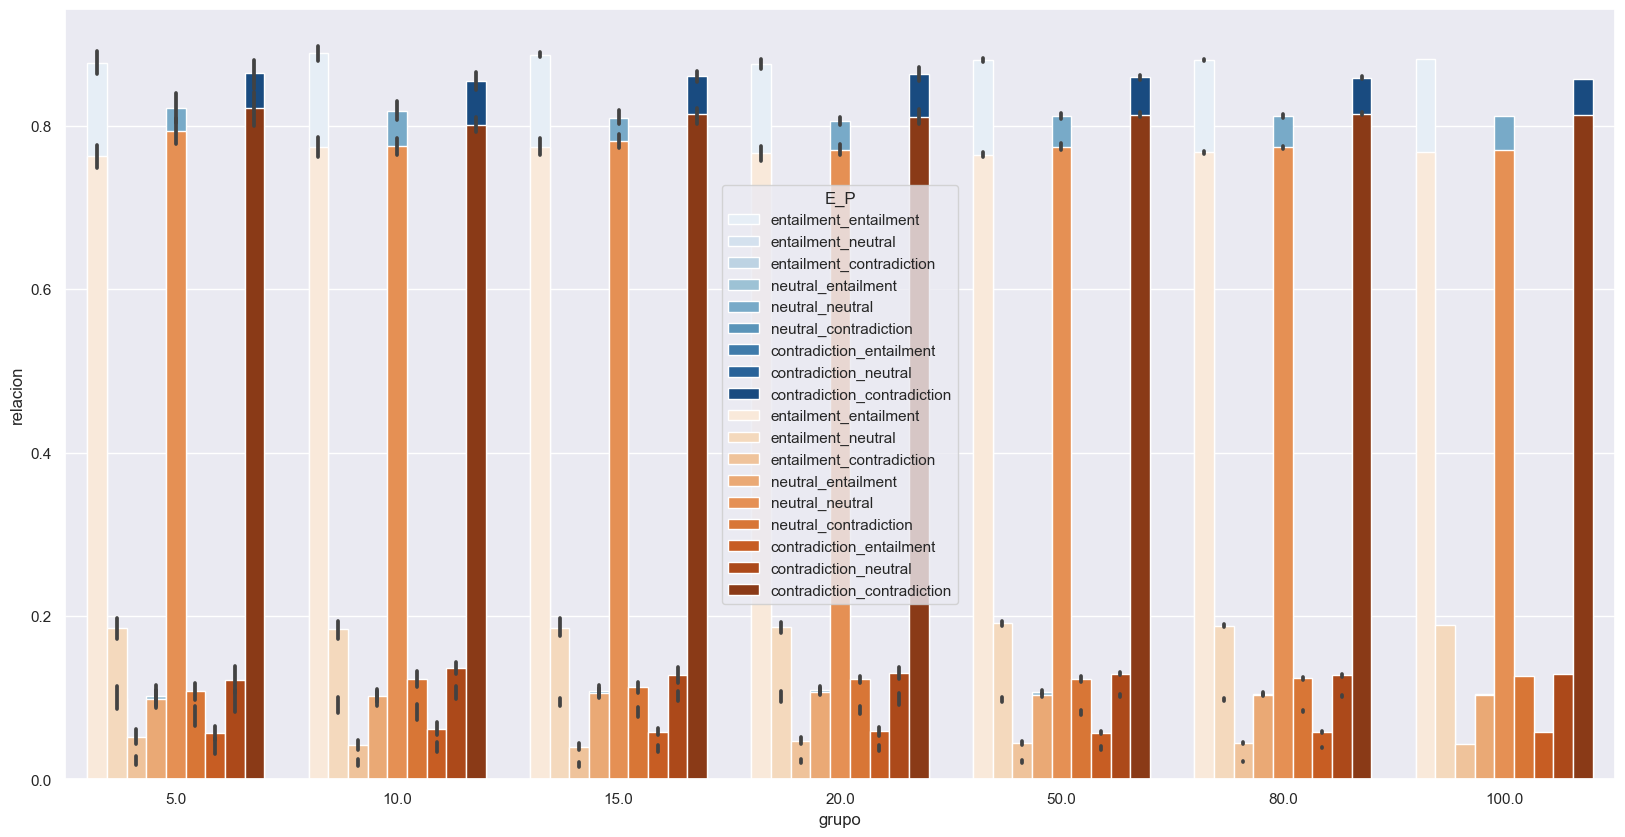

In [11]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_sinparafraseo,x="grupo",y="relacion", hue="E_P",palette="Blues")
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P",palette="Oranges")

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

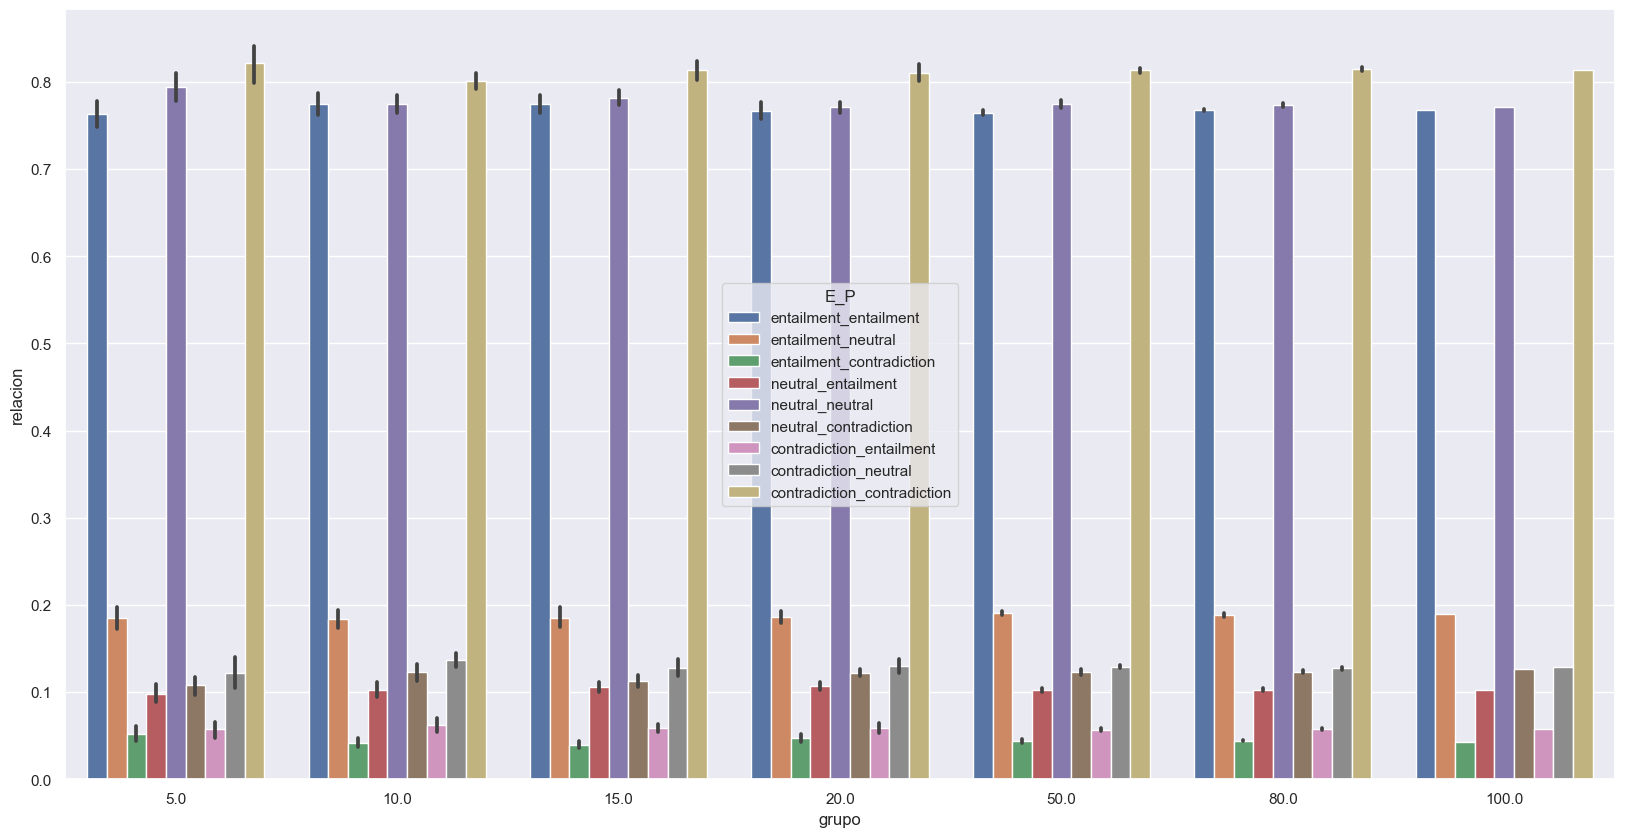

In [12]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P")

## Los anteriores resultados muestran que en cada muestreo hay una gran diferencia de los aciertos vs los errores un promedio de 80 % para los casos de entailment_entailment, neutral_neutral y contradiction_contradiction.

## Por otro lado, existe un porcentaje alto (relativamente) de los X_neutral, es decir que a partir del texto no se logré decidir si es entailment o contradiction. 18% promedio de errores cuando en realidad es entailment y predice neutralidad y 12% promedio cuando debería ser contradiction. lo mismo ocurre cuando es neutralidad y predice entailment o contradiction con 10% cada uno. Y en los ultimos casos donde se parte de un entailment y predice una contradiction con un 5% y que con un target contradiction lleva a una prediccion de entailment con 5%.

##


In [13]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Matriz de alineamiento
# Procesar todos los archivos p*.pickle para agregar columnas que obtengan los POS que tienen más que un umbral

In [14]:
muestreos=['0.05','0.1','0.15','0.2','0.5','0.8','1']

In [15]:
#POS donde encuentra coincidencia
#pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ','PART','PRON','X','CCONJ','PUNCT','INTJ','SYM']

In [16]:
pos=['NOUN','VERB','ADP','ADV','ADJ']

In [17]:
# De acuerdo al análisis estadístico se obtiene que el umbral es de 0.5
umbral=0.5

In [18]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'minimo':[],'maximo':[],'3quartile':[]}
for g in muestreos:
    a=glob.glob(carpeta+'p*_'+g+'_*.pickle')
    for e in a:
        min_max=[]
        temp=pd.read_pickle(e)
        df=temp.copy()
        temp=temp.assign(ma_umbral="")
        for indice,strings in df.iterrows():
            t=strings['Text']
            h=strings['Hipotesis']
            matriz=strings['M_Align']
            matriz_c=matriz[1:len(t)-1,1:len(h)-1]
            min_max.extend(matriz_c.flatten())
            # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
            if(len(t[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
            elif(len(h[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
            else:
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
            c_a=p1_df1.columns
            data=pd.DataFrame("",columns=pos,index=pos)
            for i,strings2 in p1_df1.iterrows():
                for j in range(len(c_a)):
                    if(strings2[j]>umbral):
                        if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
                            data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
            temp.at[indice,'ma_umbral']=data
            temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        temp.to_pickle(e)
        new_data['Docs'].append(e)
        new_data['grupo'].append(g)
        new_data['datos'].append(min_max[:])
        new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
        new_data['minimo'].append(np.min(np.asarray(min_max)))
        new_data['maximo'].append(np.max(np.asarray(min_max)))
        min_max.clear()
df_resume=pd.DataFrame(new_data)
df_resume.to_pickle(carpeta+"align/data_POS_ALIGN.pickle")

# Identificación de umbral de alineamiento para obtener el 60% de los valores mayores al umbral

In [19]:
df=pd.read_pickle(carpeta+"align/data_POS_ALIGN.pickle")

In [20]:
df

Docs grupo  \
0    data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
1    data/base_training_QQP_salida\pTEST_new_0.05_1...  0.05   
2    data/base_training_QQP_salida\pTEST_new_0.05_1...  0.05   
3    data/base_training_QQP_salida\pTEST_new_0.05_1...  0.05   
4    data/base_training_QQP_salida\pTEST_new_0.05_1...  0.05   
..                                                 ...   ...   
116  data/base_training_QQP_salida\pTEST_new_0.8_6....   0.8   
117  data/base_training_QQP_salida\pTEST_new_0.8_7....   0.8   
118  data/base_training_QQP_salida\pTEST_new_0.8_8....   0.8   
119  data/base_training_QQP_salida\pTEST_new_0.8_9....   0.8   
120  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   

                                                 datos  minimo    maximo  \
0    [1.5194842, 0.12662871, 0.065819025, 0.6205197...     0.0  9.032872   
1    [0.11196405, 0.026913851, 0.34610647, 0.040455...     0.0  9.173684   
2    [0.06124195, 0.014831392, 0.02611161, 0.045506...     0.0  8.681258   
3    [0.02611161, 0.03230063, 0.070524834, 0.026111...     0.0  8.220510   
4    [0.02611161, 0.045506727, 0.014831392, 0.02767...     0.0  8.132582   
..                                                 ...     ...       ...   
116  [2.1025875, 0.052005947, 0.59341913, 0.7001385...     0.0  9.173684   
117  [0.02611161, 0.07318912, 0.014831392, 0.005197...     0.0  9.173684   
118  [0.06124195, 0.014831392, 0.06375257, 0.0, 0.0...     0.0  9.173684   
119  [2.1025875, 0.4737378, 0.536402, 0.34379983, 0...     0.0  9.173684   
120  [0.0036990044, 0.13301374, 0.0063584773, 0.025...     0.0  9.173684   

     3quartile  
0     0.477795  
1     0.496920  
2     0.514611  
3     0.501823  
4     0.484393  
..         ...  
116   0.496377  
117   0.492832  
118   0.493747  
119   0.494499  
120   0.495027  

[121 rows x 6 columns]

In [21]:
umbral=df['3quartile'].mean()
umbral

0.4948694020017119

In [22]:
data = df['datos'][0]
data.sort()
len(data)

68227

In [23]:
#Vamos a eliminar los ceros
nueva_data=[]
for e in data:
    if e!=0.0:
        nueva_data.append(e)
print(len(nueva_data))

66924


In [24]:
#Como ya esta ordenado nos vamos a quedar con el 40% de los datos y el ultimo será el umbral
nd=nueva_data[:round(len(nueva_data)*0.5)]
nd[-1]

0.08565567

In [25]:
np.median(nueva_data)

0.08565567

In [26]:
print(np.quantile(nueva_data,q=0.25))
print(np.quantile(nueva_data,q=0.5))
print(np.quantile(nueva_data,q=0.75))
print(np.quantile(nueva_data,q=1))

0.021523084491491318
0.08565566688776016
0.49170130491256714
9.032872


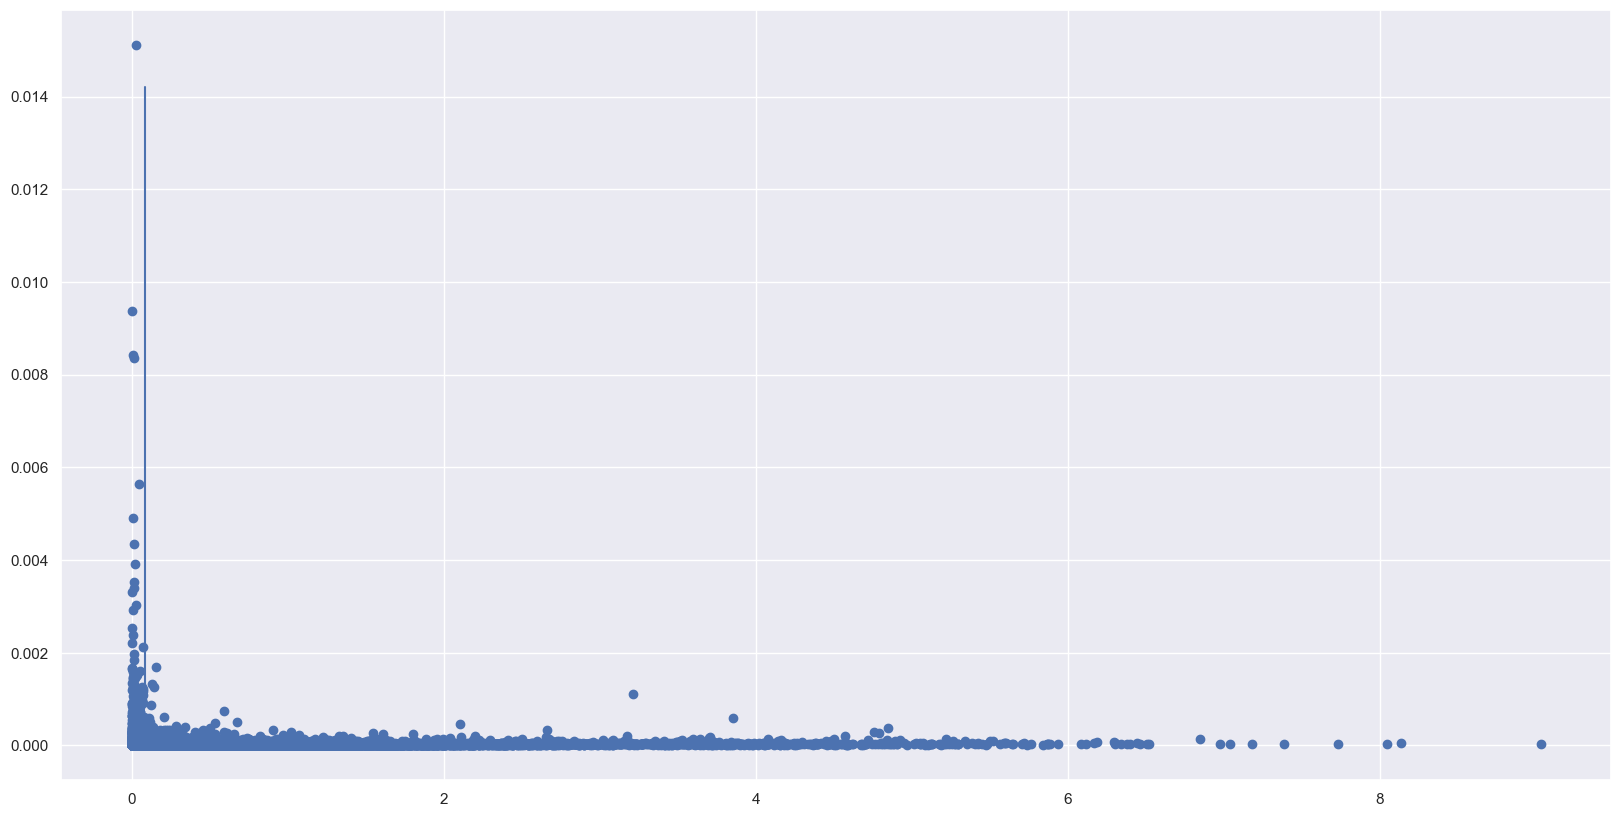

In [27]:
# Vamos a dibujar el umbral y la distribución de los datos
min_d=min(nueva_data)
max_d=max(nueva_data)
tamanio=len(nueva_data)
unicos = list(set(nueva_data))
y = [ nueva_data.count(x)/tamanio for x in unicos]
fig, ax = plt.subplots()
ax.scatter(x = unicos, y = y)
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9)
plt.show() #dibujamos el histograma

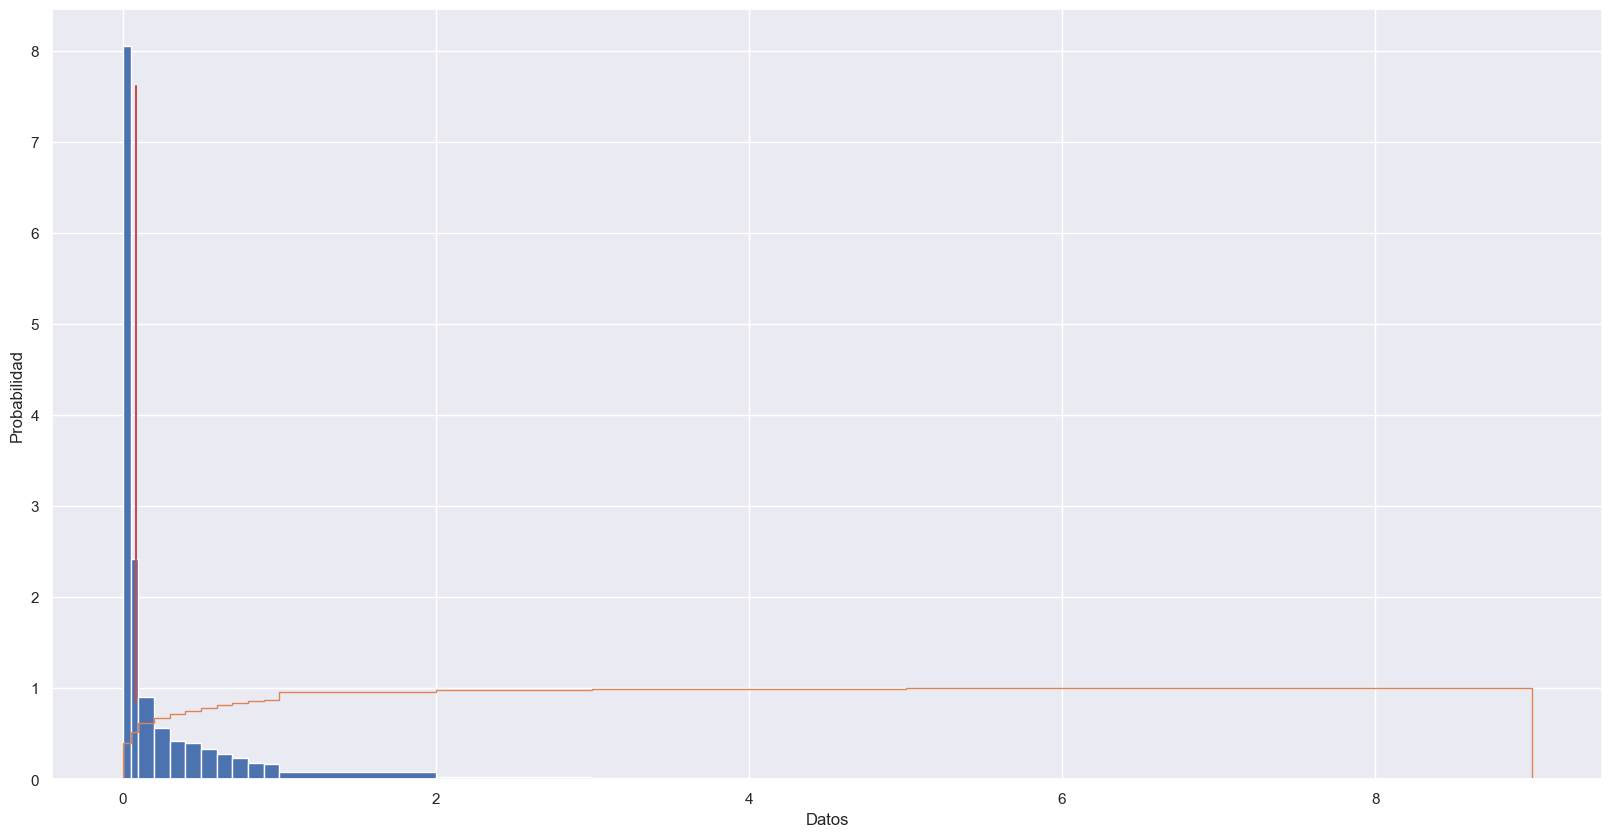

In [28]:
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True)
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True, cumulative=True, label='CDF', histtype='step')
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9, color = "r")   
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show() 

# De acuerdo al umbral obtener pares de palabras del texto y la hipótesis mayores a este (1)

In [29]:
muestreos

['0.05', '0.1', '0.15', '0.2', '0.5', '0.8', '1']

In [30]:
a=glob.glob(carpeta+'p*_'+muestreos[1]+'_*.pickle')
a

['data/base_training_QQP_salida\\pTEST_new_0.1_0.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_1.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_10.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_11.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_12.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_13.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_14.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_15.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_16.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_17.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_18.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_19.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_2.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_3.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_4.csv.pickle',
 'data/base_training_QQP_salida\\pTEST_new_0.1_5.csv.pickle'

In [31]:
dfm=pd.read_pickle(a[0])
dfm

Main index                                               Text  \
0              0  [NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, ge...   
1              1  [NULL{null,PROPN}, rose{rise,VERB}, petals{pet...   
2              2  [NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...   
3              3  [NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...   
4              4  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, si...   
...          ...                                                ...   
1199        1199  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   
1200        1200  [NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...   
1201        1201  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   
1202        1202  [NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, dr...   
1203        1203  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...   

                                              Hipotesis  \
0     [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, as...   
1     [NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...   
2     [NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...   
3     [NULL{null,PROPN}, the{the,DET}, young{young,A...   
4     [NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...   
...                                                 ...   
1199  [NULL{null,INTJ}, my{-PRON-,ADJ}, two{two,NUM}...   
1200  [NULL{null,PROPN}, what{what,NOUN}, are{be,VER...   
1201  [NULL{null,ADJ}, if{if,ADP}, two{two,NUM}, men...   
1202  [NULL{null,PROPN}, drags{drag,VERB}, his{-PRON...   
1203  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   

                                                 R_Text  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1199  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1200  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1201  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1202  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1203  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                  R_Hip  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1199  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1200  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1201  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1202  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1203  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                M_Align  \
0     [[0.085589595, 0.014024382, 0.1707767, 0.23678...   
1     [[0.085589595, 0.014024382, 0.144041, 0.178603...   
2     [[0.085589595, 0.014024382, 0.19426414, 0.0161...   
3     [[0.085589595, 0.004343943, 0.053287175, 0.170...   
4     [[0.085589595, 0.004343943, 0.1707767, 0.01616...   
...                                                 ...   
1199  [[0.085589595, 0.083698966, 0.08687423, 0.1764...   
1200  [[0.085589595, 0.13200963, 0.011193112, 0.0043...   
1201  [[0.085589595, 0.24369477, 0.08687423, 0.21513...   
1202  [[0.085589595, 0.1299563, 0.12724167, 0.196015...   
1203  [[0.085589595, 0.08687423, 0.21513091, 0.17841...   

                                     Prediction       Gold_label  Paraphrase  \
0       [0.0008823555, 0.0015298445, 0.9975878]  [0.0, 0.0, 1.0]           0   
1      [0.00012464494, 0.0069868723, 0.9928885]  [0.0, 0.0, 1.0]           0   
2     [0.0044233534, 0.99513125, 0.00044541556]  [0.0, 1.0, 0.0]           0 

In [32]:
dfm['ma_umbral'][1]

NOUN                   VERB ADP ADV         ADJ
NOUN    ,2.1909058,2.9340022             ,1.6121764          ,1.0256171
VERB     ,1.5595211,2.265975  ,0.83202153,2.2882948          ,1.0857038
ADP                ,1.032502             ,0.9733523                    
ADV                                                                    
ADJ   ,0.50795084,0.67808646            ,0.50616676          ,4.1505594

In [33]:
dfm

Main index                                               Text  \
0              0  [NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, ge...   
1              1  [NULL{null,PROPN}, rose{rise,VERB}, petals{pet...   
2              2  [NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...   
3              3  [NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...   
4              4  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, si...   
...          ...                                                ...   
1199        1199  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   
1200        1200  [NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...   
1201        1201  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   
1202        1202  [NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, dr...   
1203        1203  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...   

                                              Hipotesis  \
0     [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, as...   
1     [NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...   
2     [NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...   
3     [NULL{null,PROPN}, the{the,DET}, young{young,A...   
4     [NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...   
...                                                 ...   
1199  [NULL{null,INTJ}, my{-PRON-,ADJ}, two{two,NUM}...   
1200  [NULL{null,PROPN}, what{what,NOUN}, are{be,VER...   
1201  [NULL{null,ADJ}, if{if,ADP}, two{two,NUM}, men...   
1202  [NULL{null,PROPN}, drags{drag,VERB}, his{-PRON...   
1203  [NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...   

                                                 R_Text  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1199  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1200  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1201  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1202  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1203  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                  R_Hip  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1199  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1200  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1201  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1202  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1203  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                M_Align  \
0     [[0.085589595, 0.014024382, 0.1707767, 0.23678...   
1     [[0.085589595, 0.014024382, 0.144041, 0.178603...   
2     [[0.085589595, 0.014024382, 0.19426414, 0.0161...   
3     [[0.085589595, 0.004343943, 0.053287175, 0.170...   
4     [[0.085589595, 0.004343943, 0.1707767, 0.01616...   
...                                                 ...   
1199  [[0.085589595, 0.083698966, 0.08687423, 0.1764...   
1200  [[0.085589595, 0.13200963, 0.011193112, 0.0043...   
1201  [[0.085589595, 0.24369477, 0.08687423, 0.21513...   
1202  [[0.085589595, 0.1299563, 0.12724167, 0.196015...   
1203  [[0.085589595, 0.08687423, 0.21513091, 0.17841...   

                                     Prediction       Gold_label  Paraphrase  \
0       [0.0008823555, 0.0015298445, 0.9975878]  [0.0, 0.0, 1.0]           0   
1      [0.00012464494, 0.0069868723, 0.9928885]  [0.0, 0.0, 1.0]           0   
2     [0.0044233534, 0.99513125, 0.00044541556]  [0.0, 1.0, 0.0]           0 

In [34]:
tp=dfm['target_prediction'].unique()

In [35]:
len(tp)

9

In [36]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [37]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
for gp in muestreos:
    a=glob.glob(carpeta+'p*_'+gp+'_*.pickle')
    for e in a:
        print(e)
        temp=pd.read_pickle(e)
        for f in labels:
            #obtener la matriz de alineamiento
            for pf in [0,1]:
                #vamos a filtrar por target prediction
                data={}
                temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
                for index2,strings2 in temp2.iterrows():
                    dt=strings2['ma_umbral']
                    columnas3=dt.columns
                    for index3,strings3 in dt.iterrows():
                        for c in columnas3:
                            num=strings3[c].split(',')
                            if(len(num)>1):
                                if(index3+"_"+c in data):
                                    g=data[index3+"_"+c]
                                    #print(g,index3+"_"+c)
                                    data[index3+"_"+c]= g+num[1:]
                                    #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
                                elif(c+"_"+index3 in data):
                                    g=data[c+"_"+index3]
                                    #print(g,index3+"_"+c)
                                    data[c+"_"+index3]= g+num[1:]
                                else:
                                    #print("entra:",index3+"_"+c,num[1:])
                                    data[index3+"_"+c]=num[1:]
                new_data['Docs'].append(e)
                new_data['grupo'].append(gp)
                new_data['datos'].append(data)
                new_data['etiqueta'].append(f)
                new_data['paraphrase'].append(pf)
data_boxplot=pd.DataFrame(new_data)
data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

data/base_training_QQP_salida\pTEST_new_0.05_0.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_1.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_10.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_11.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_12.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_13.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_14.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_15.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_16.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_17.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_18.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_19.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_2.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_3.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_4.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_5.csv.pickle
data/base_training_QQP_salida\pTEST_new_0.05_6.csv.pickle
data

In [38]:
# Se obtuvieron dos dataframe finales 
# 1) data_POS_ALIGN_T_H.pickle que toma en cuenta la dirección de la alineación de un archivo de un muestreo, por target_prediction 
# es decir NOUN_ADJ es NOUN (Texto) y ADJ (hipótesis) que es diferente de ADJ_NOUN: ADJ (Texto) y NOUN (hipótesis)
# 2) data_POS_ALIGN.pickle no toma en cuenta la dirección de la alineación si no solo el tipo de palabras que se vinculan
# no importa en donde este Texto o Hipótesis

In [39]:
data_boxplot=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [40]:
data_boxplot

Docs grupo  \
0     data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
1     data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
2     data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
3     data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
4     data/base_training_QQP_salida\pTEST_new_0.05_0...  0.05   
...                                                 ...   ...   
2173  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   
2174  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   
2175  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   
2176  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   
2177  data/base_training_QQP_salida\pTEST_new_1_0.cs...     1   

                                                  datos  \
0     {'NOUN_NOUN': ['0.50438756', '1.0076041', '0.6...   
1     {'NOUN_ADJ': ['0.6069606', '1.097279', '0.9239...   
2     {'NOUN_NOUN': ['4.5691986', '1.8939096', '0.88...   
3     {'NOUN_NOUN': ['4.9488564', '1.1360898', '4.18...   
4     {'NOUN_NOUN': ['3.2146893', '2.6639285', '0.88...   
...                                                 ...   
2173  {'NOUN_NOUN': ['3.258878', '0.5455615', '2.991...   
2174  {'NOUN_NOUN': ['3.2146893', '0.6985917', '1.04...   
2175  {'NOUN_NOUN': ['3.2655084', '0.75088835', '3.3...   
2176  {'NOUN_NOUN': ['3.2146893', '0.68994904', '0.6...   
2177  {'NOUN_NOUN': ['0.7414739', '2.2623584', '2.16...   

                         etiqueta  paraphrase  
0           entailment_entailment           0  
1           entailment_entailment           1  
2              entailment_neutral           0  
3              entailment_neutral           1  
4        entailment_contradiction           0  
...                           ...         ...  
2173     contradiction_entailment           1  
2174        contradiction_neutral           0  
2175        contradiction_neutral           1  
2176  contradiction_contradiction           0  
2177  contradiction_contradiction           1  

[2178 rows x 5 columns]

In [41]:
dict0=data_boxplot['datos'][0]
dict1=data_boxplot['datos'][1]

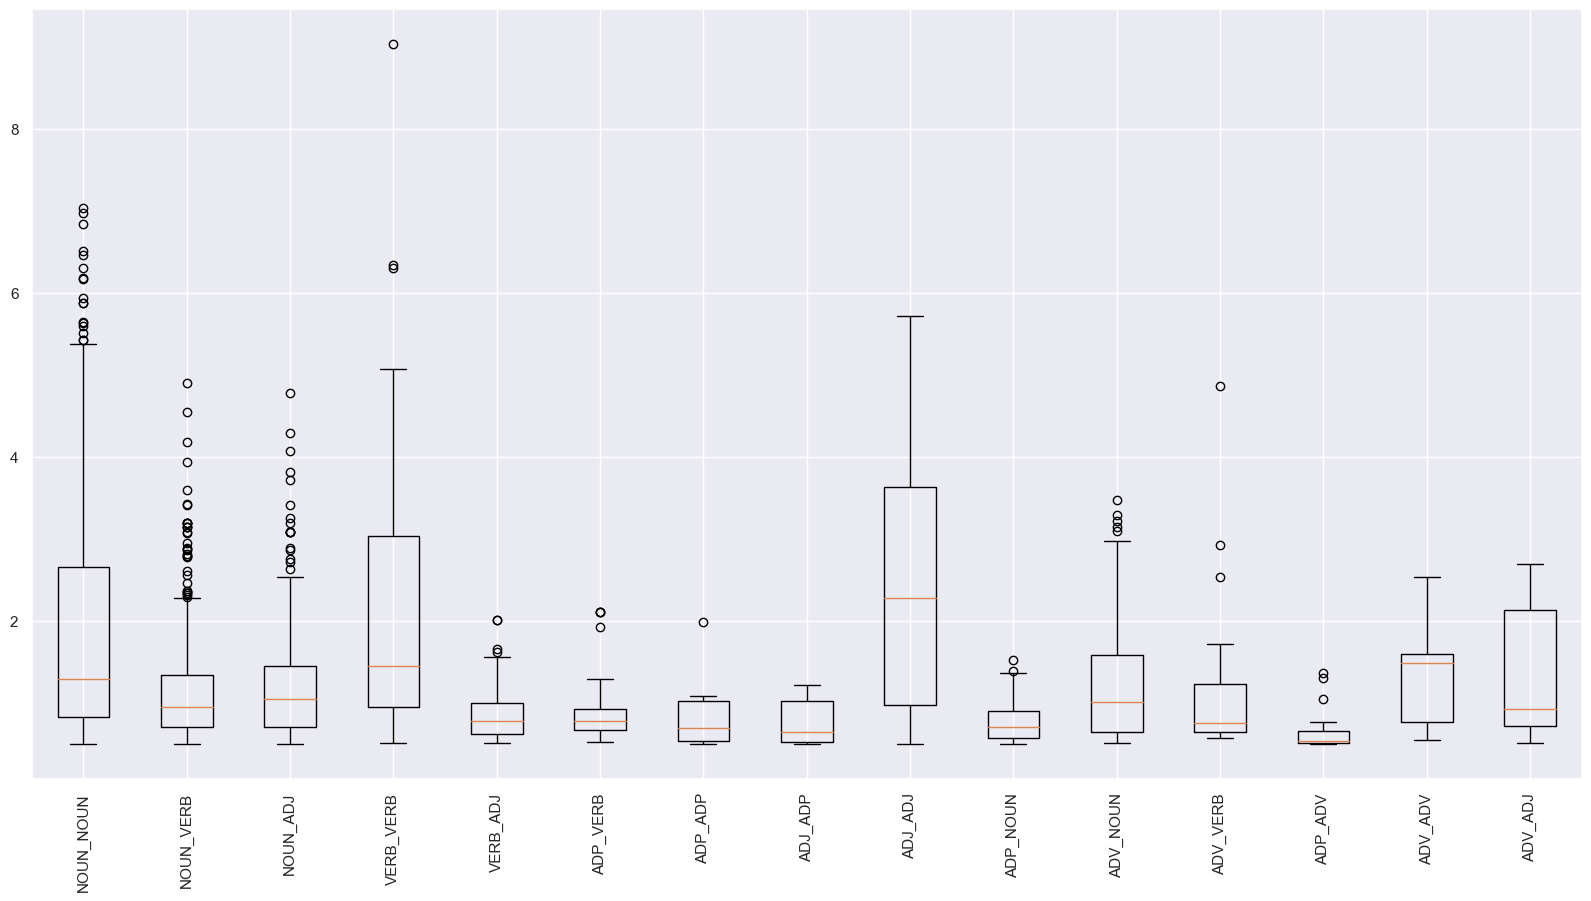

In [42]:
data_final0=[]

# or backwards compatable    
labels0, data0 = dict0.keys(), list(dict0.values())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0) + 1), labels0)
plt.show()

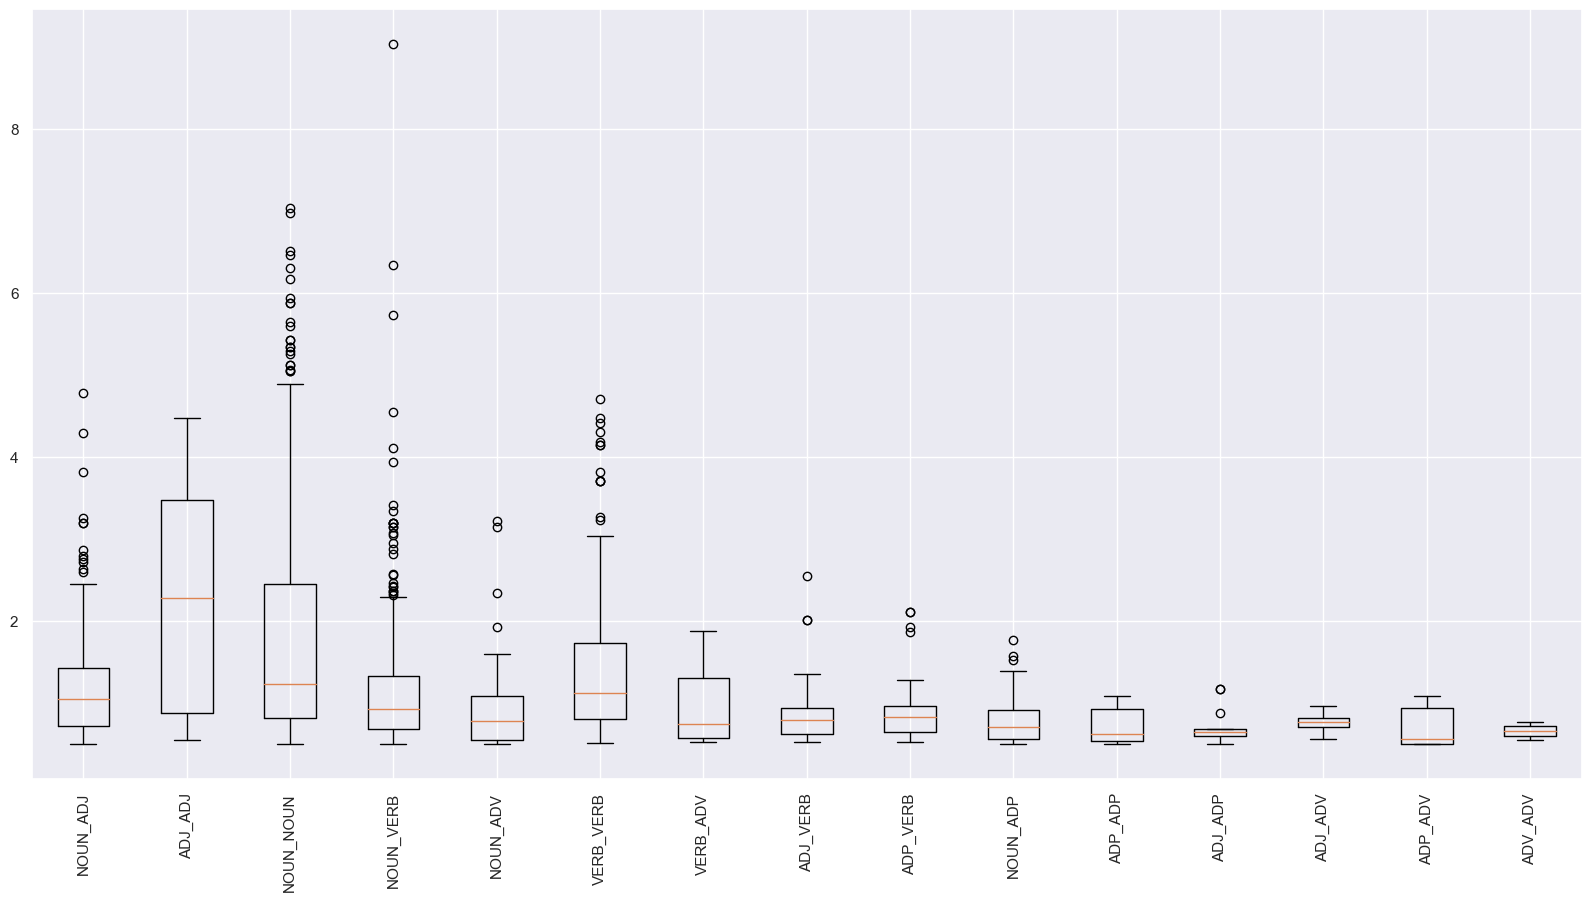

In [43]:
data_final1=[]
# or backwards compatable    
labels1, data1 = dict1.keys(), list(dict1.values())
for i in range(len(data1)):
    floats = [float(x) for x in data1[i]]
    data_final1.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1) + 1), labels1)
plt.show()

# Procesar los dataframe de forma global por muestreo y compararlos con target_prediction de acuerdo a los tipos de palabras que se alinearon

In [44]:
df_global=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [45]:
from itertools import chain
from collections import defaultdict

In [46]:
new_data = {'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
temp=df_global.copy()
for gp in muestreos:
    for f in tp:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf) & (temp['grupo']==gp)]
            dt_b = defaultdict(list)
            for index2,strings2 in temp2.iterrows():
                dt=strings2['datos']
                for k, v in chain(dt.items()):
                    dt_b[k].append(v)
            new_data['grupo'].append(gp)
            new_data['datos'].append(dt_b)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot_global=pd.DataFrame(new_data)
data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [47]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [48]:
data_boxplot_global

grupo                                              datos  \
0    0.05  {'NOUN_NOUN': [['5.840953', '5.0276847', '0.99...   
1    0.05  {'NOUN_NOUN': [['2.289463', '0.56549954', '1.0...   
2    0.05  {'NOUN_NOUN': [['3.2146893', '0.6098265', '1.7...   
3    0.05  {'NOUN_NOUN': [['0.7529042', '0.60676646', '4....   
4    0.05  {'NOUN_NOUN': [['0.50438756', '1.0076041', '0....   
..    ...                                                ...   
121     1  {'NOUN_NOUN': [['1.2198656', '2.2206006', '0.9...   
122     1  {'NOUN_NOUN': [['2.5168848', '1.2686363', '1.5...   
123     1  {'NOUN_NOUN': [['1.9711912', '1.5604641', '2.4...   
124     1  {'NOUN_NOUN': [['0.74993396', '4.600057', '1.8...   
125     1  {'NOUN_NOUN': [['3.258878', '0.5455615', '2.99...   

                        etiqueta  paraphrase  
0    contradiction_contradiction           0  
1    contradiction_contradiction           1  
2                neutral_neutral           0  
3                neutral_neutral           1  
4          entailment_entailment           0  
..                           ...         ...  
121     entailment_contradiction           1  
122           entailment_neutral           0  
123           entailment_neutral           1  
124     contradiction_entailment           0  
125     contradiction_entailment           1  

[126 rows x 4 columns]

In [49]:
dict0_g=data_boxplot_global['datos'][0]
dict1_g=data_boxplot_global['datos'][1]
dict2_g=data_boxplot_global['datos'][2]
dict3_g=data_boxplot_global['datos'][3]
dict4_g=data_boxplot_global['datos'][4]
dict5_g=data_boxplot_global['datos'][5]

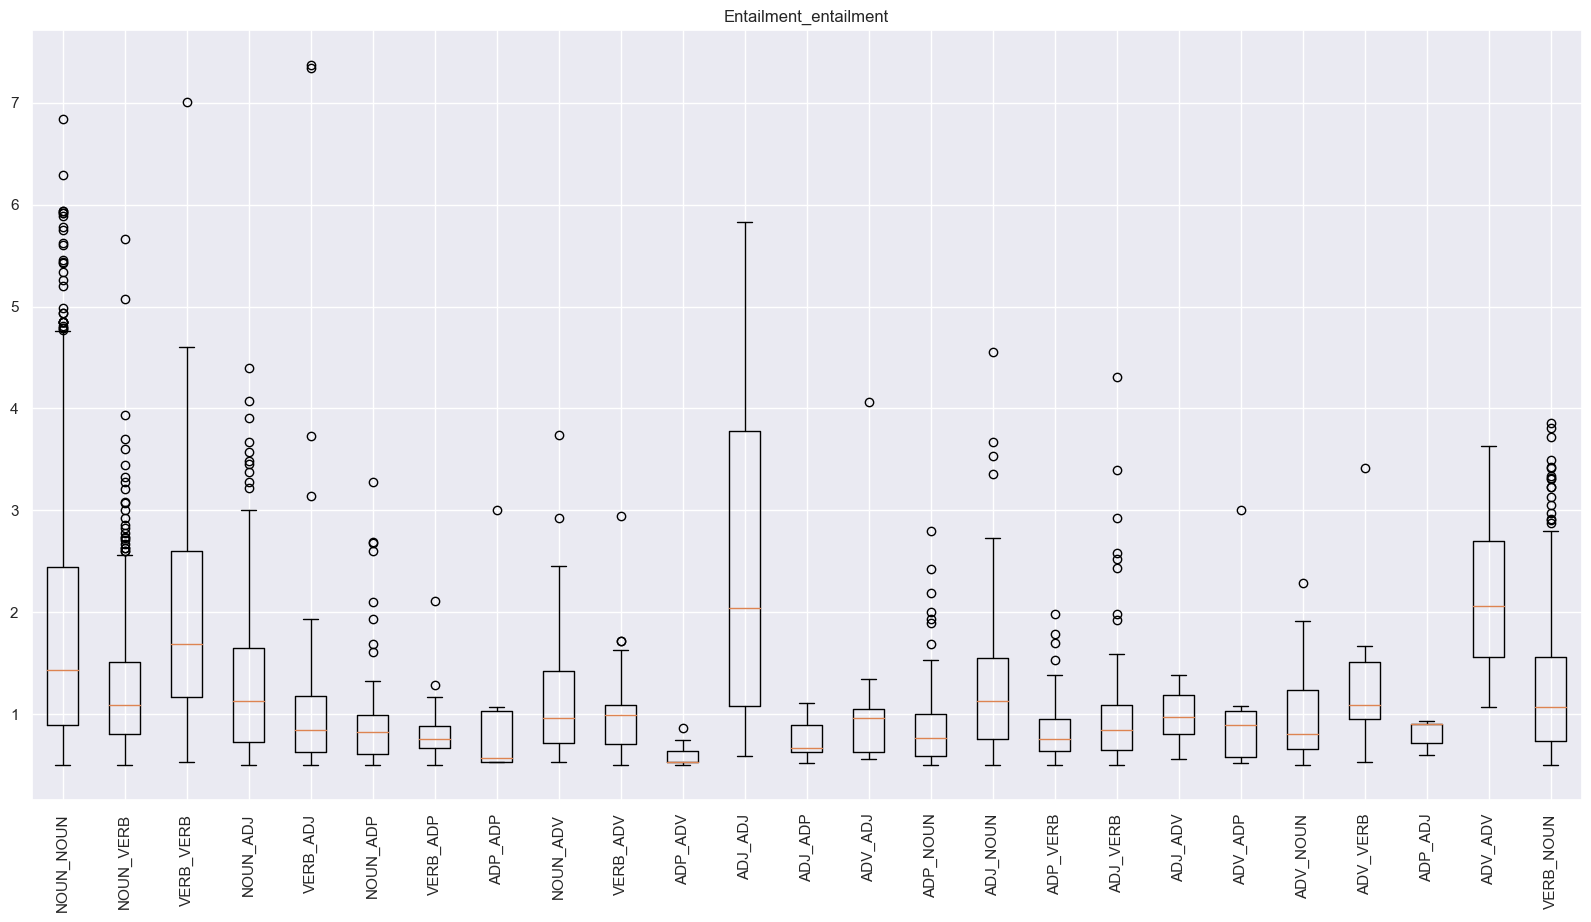

In [50]:
data_final0g=[]

# or backwards compatable    
labels0g, data0g = dict0_g.keys(), list(dict0_g.values())
for i in range(len(data0g)):
    for j in range(len(data0g[i])):
        floats = [float(x) for x in data0g[i][j]]
    data_final0g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0g) + 1), labels0g)
plt.title("Entailment_entailment")
plt.show()

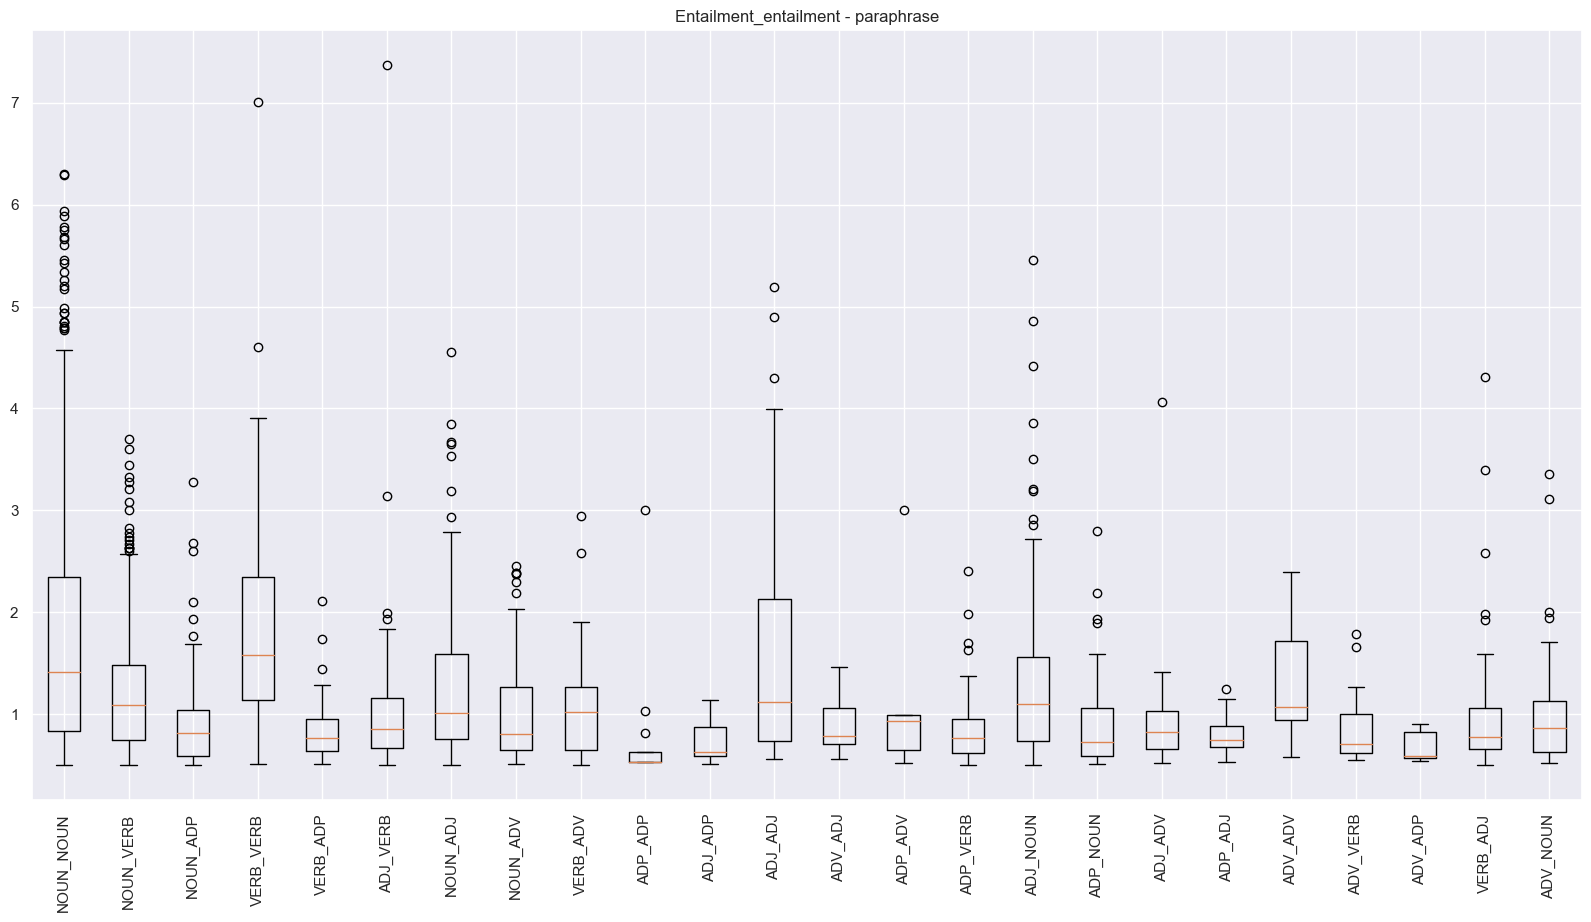

In [51]:
data_final1g=[]

# or backwards compatable    
labels1g, data1g = dict1_g.keys(), list(dict1_g.values())
for i in range(len(data1g)):
    for j in range(len(data1g[i])):
        floats = [float(x) for x in data1g[i][j]]
    data_final1g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1g) + 1), labels1g)
plt.title("Entailment_entailment - paraphrase")
plt.show()

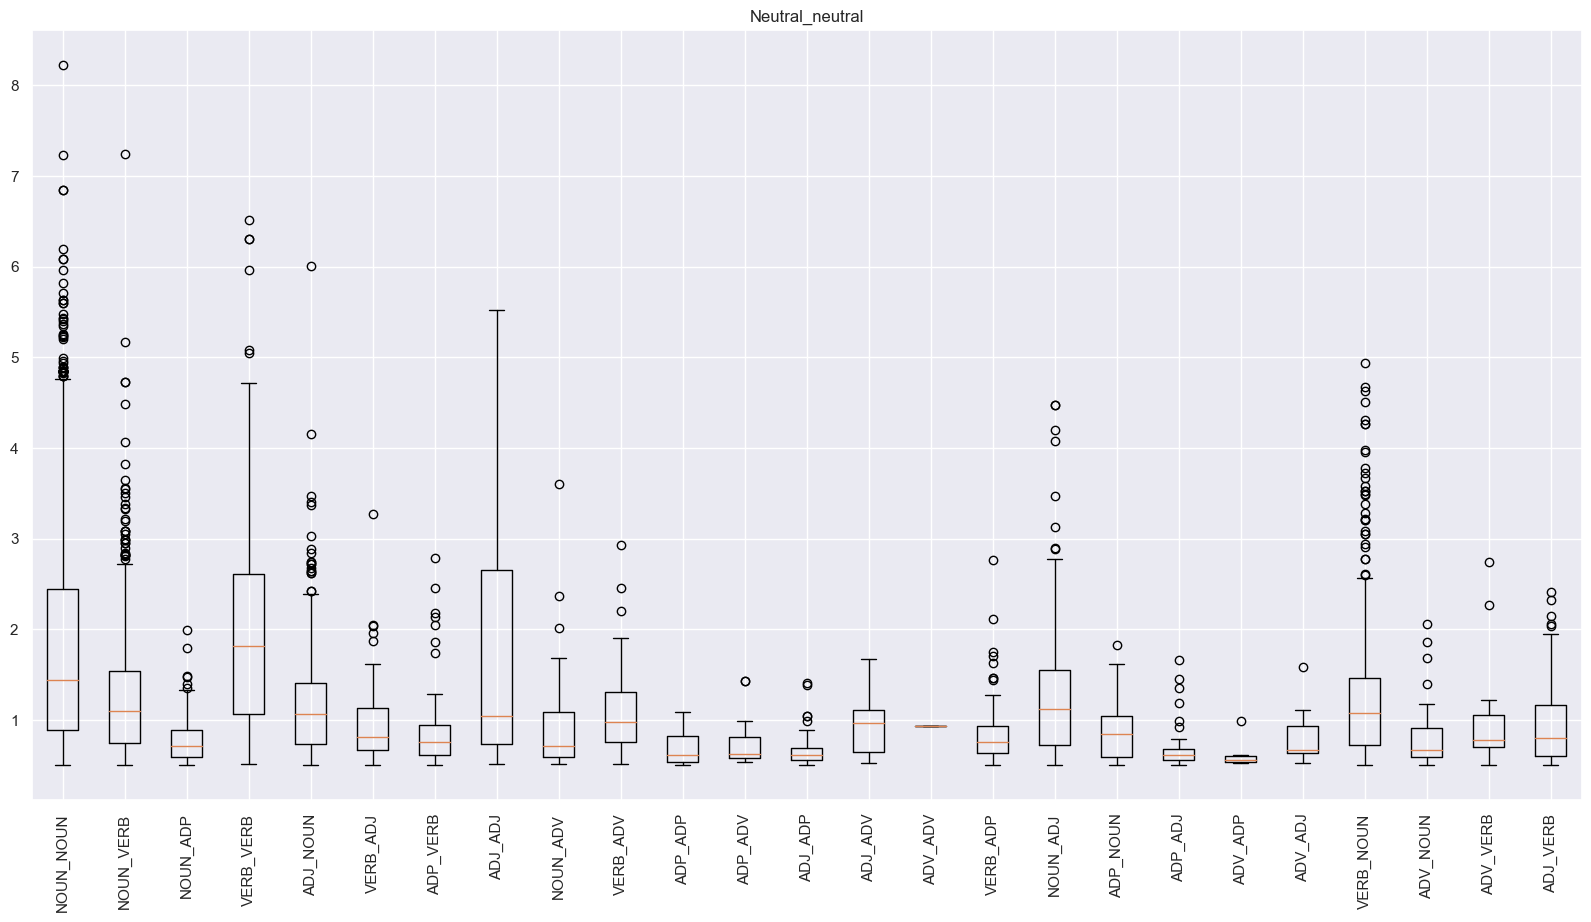

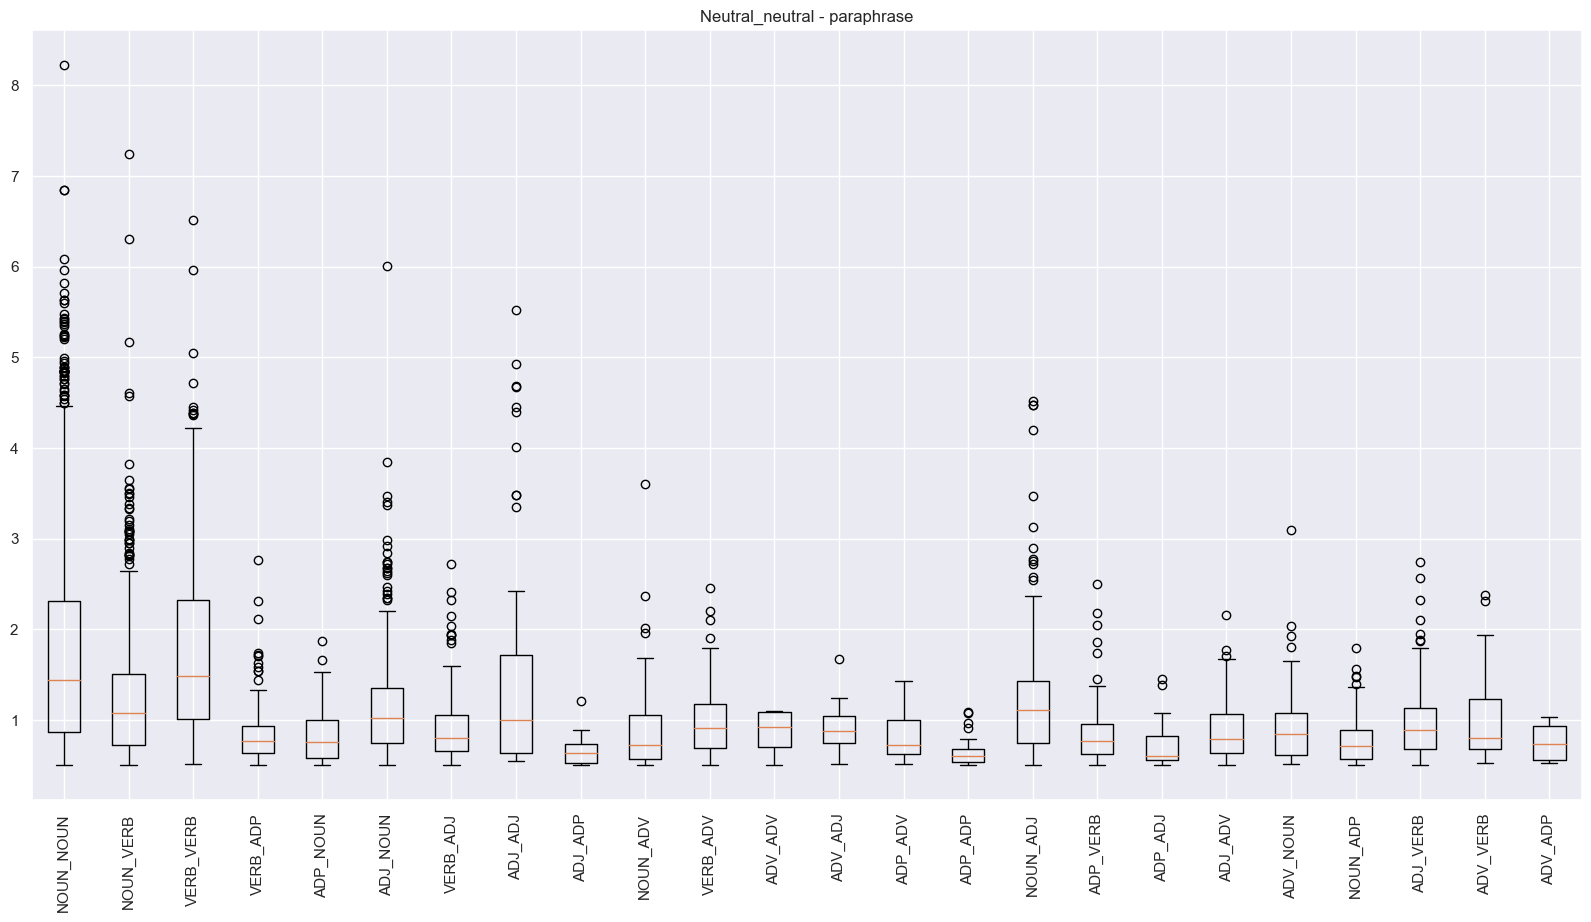

In [52]:
data_final2g=[]

# or backwards compatable    
labels2g, data2g = dict2_g.keys(), list(dict2_g.values())
for i in range(len(data2g)):
    for j in range(len(data2g[i])):
        floats = [float(x) for x in data2g[i][j]]
    data_final2g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final2g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels2g) + 1), labels2g)
plt.title("Neutral_neutral")
plt.show()

data_final3g=[]

# or backwards compatable    
labels3g, data3g = dict3_g.keys(), list(dict3_g.values())
for i in range(len(data3g)):
    for j in range(len(data3g[i])):
        floats = [float(x) for x in data3g[i][j]]
    data_final3g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final3g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels3g) + 1), labels3g)
plt.title("Neutral_neutral - paraphrase")
plt.show()

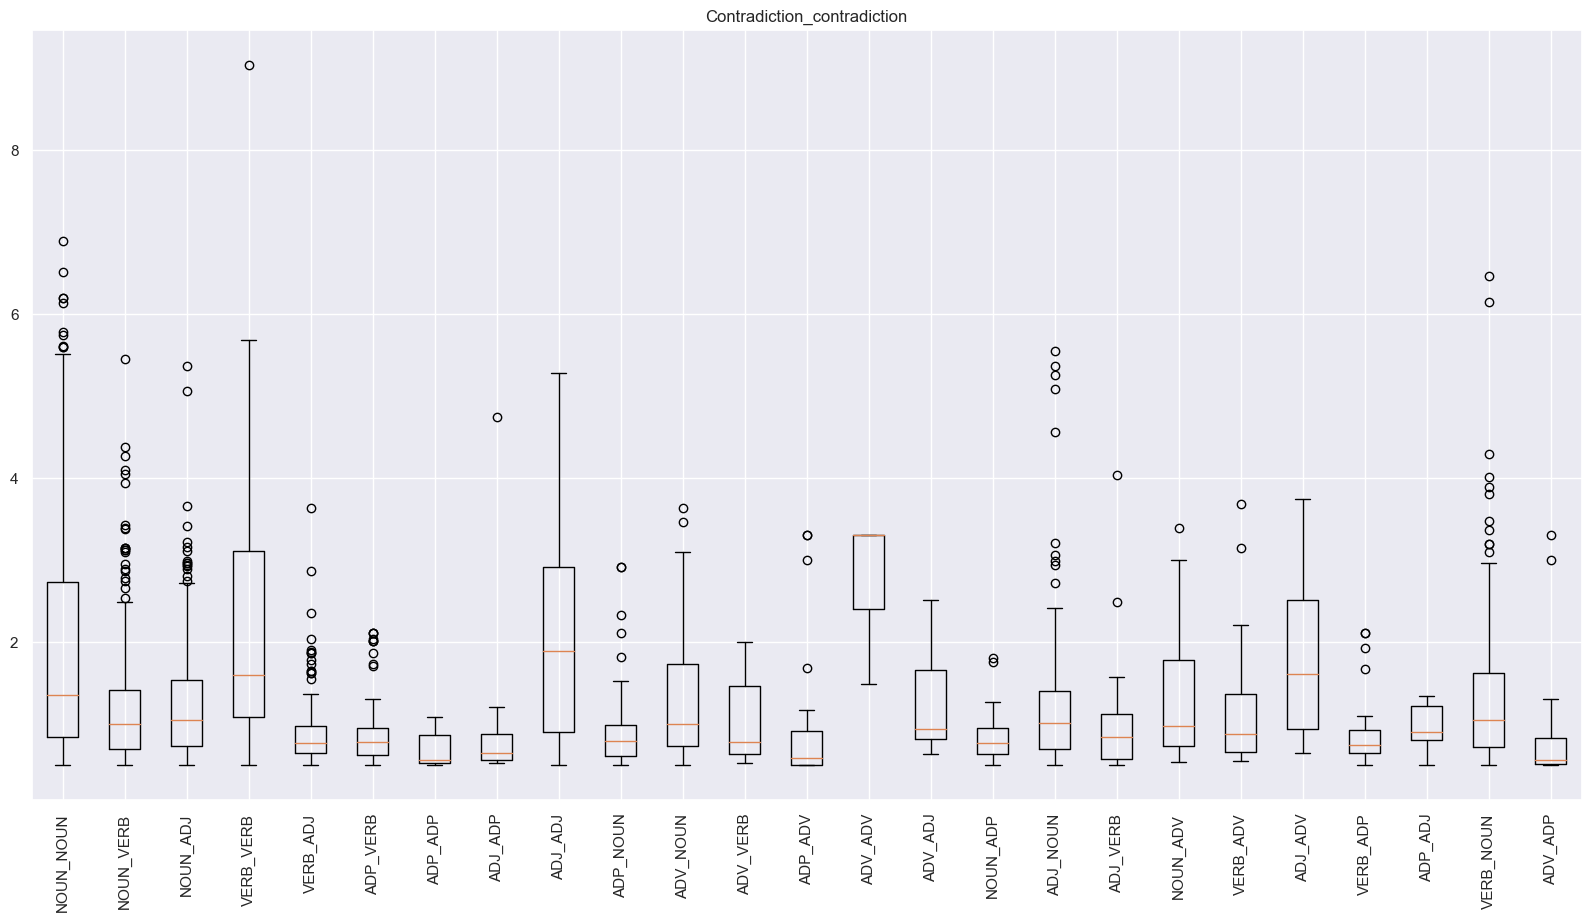

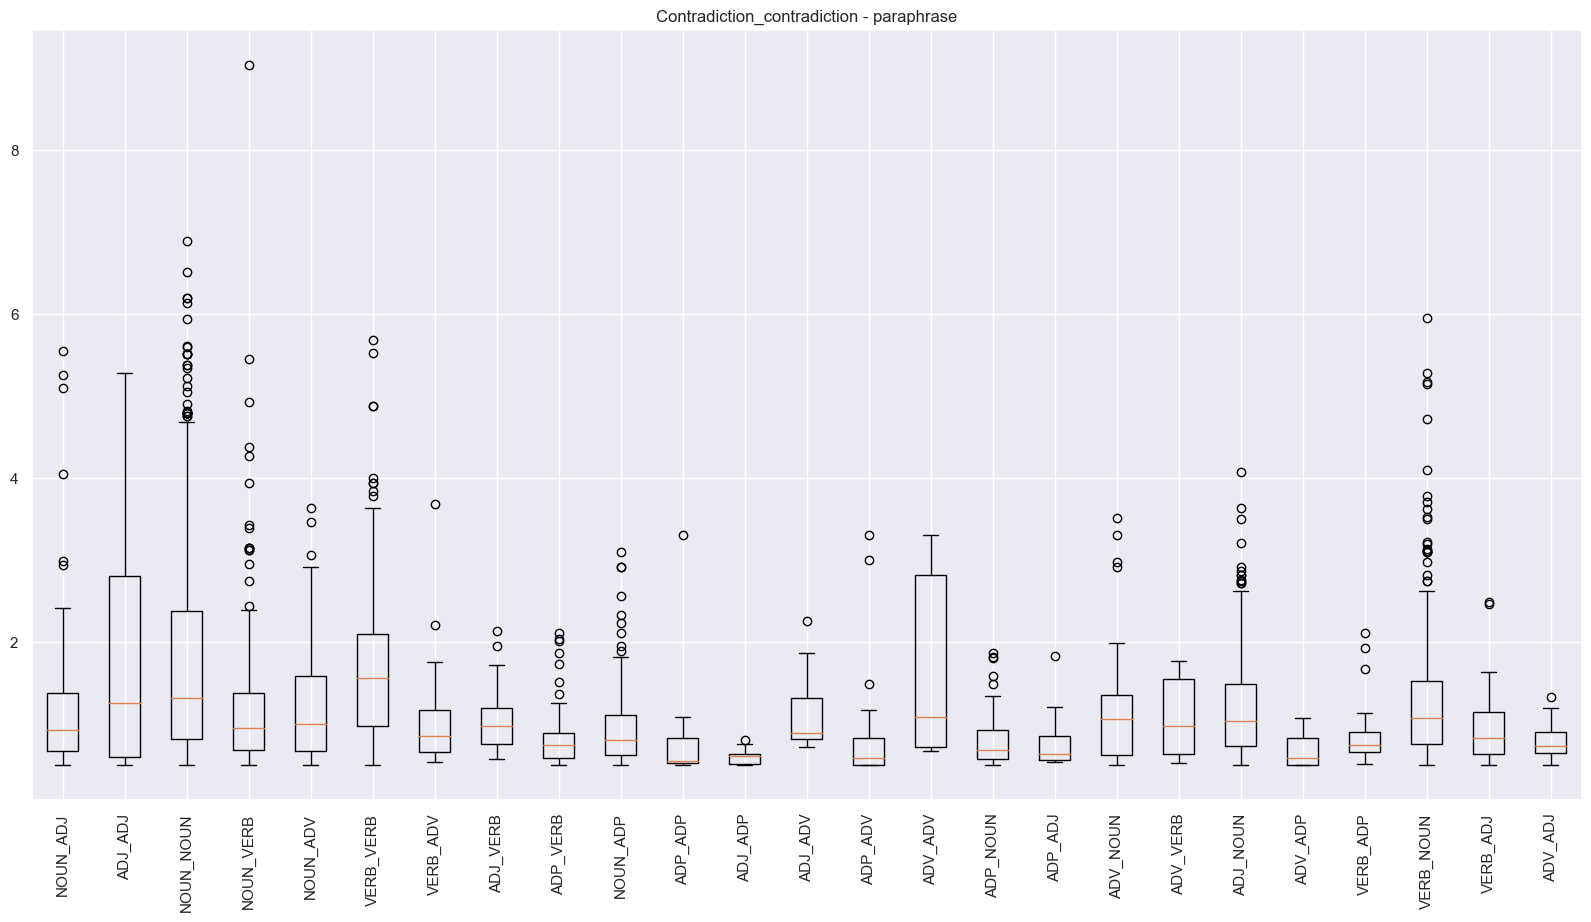

In [53]:
data_final4g=[]

# or backwards compatable    
labels4g, data4g = dict4_g.keys(), list(dict4_g.values())
for i in range(len(data4g)):
    for j in range(len(data4g[i])):
        floats = [float(x) for x in data4g[i][j]]
    data_final4g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final4g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels4g) + 1), labels4g)
plt.title("Contradiction_contradiction")
plt.show()

data_final5g=[]

# or backwards compatable    
labels5g, data5g = dict5_g.keys(), list(dict5_g.values())
for i in range(len(data5g)):
    for j in range(len(data5g[i])):
        floats = [float(x) for x in data5g[i][j]]
    data_final5g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final5g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels5g) + 1), labels5g)
plt.title("Contradiction_contradiction - paraphrase")
plt.show()

# vamos a crear los mapas de calor con conteos de los valores por tipo de palabras que tienen un alineamiento mayor al umbral

In [54]:
data_boxplot_global

grupo                                              datos  \
0    0.05  {'NOUN_NOUN': [['5.840953', '5.0276847', '0.99...   
1    0.05  {'NOUN_NOUN': [['2.289463', '0.56549954', '1.0...   
2    0.05  {'NOUN_NOUN': [['3.2146893', '0.6098265', '1.7...   
3    0.05  {'NOUN_NOUN': [['0.7529042', '0.60676646', '4....   
4    0.05  {'NOUN_NOUN': [['0.50438756', '1.0076041', '0....   
..    ...                                                ...   
121     1  {'NOUN_NOUN': [['1.2198656', '2.2206006', '0.9...   
122     1  {'NOUN_NOUN': [['2.5168848', '1.2686363', '1.5...   
123     1  {'NOUN_NOUN': [['1.9711912', '1.5604641', '2.4...   
124     1  {'NOUN_NOUN': [['0.74993396', '4.600057', '1.8...   
125     1  {'NOUN_NOUN': [['3.258878', '0.5455615', '2.99...   

                        etiqueta  paraphrase  
0    contradiction_contradiction           0  
1    contradiction_contradiction           1  
2                neutral_neutral           0  
3                neutral_neutral           1  
4          entailment_entailment           0  
..                           ...         ...  
121     entailment_contradiction           1  
122           entailment_neutral           0  
123           entailment_neutral           1  
124     contradiction_entailment           0  
125     contradiction_entailment           1  

[126 rows x 4 columns]

# Generar los mapas de calor por muestreo

In [55]:
lista_mapas=[]
lista_nombres=[]

In [56]:
for index, strings in data_boxplot_global.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        p_df.at[indice,columna]=len(v)
    lista_mapas.append(p_df.copy())
    lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

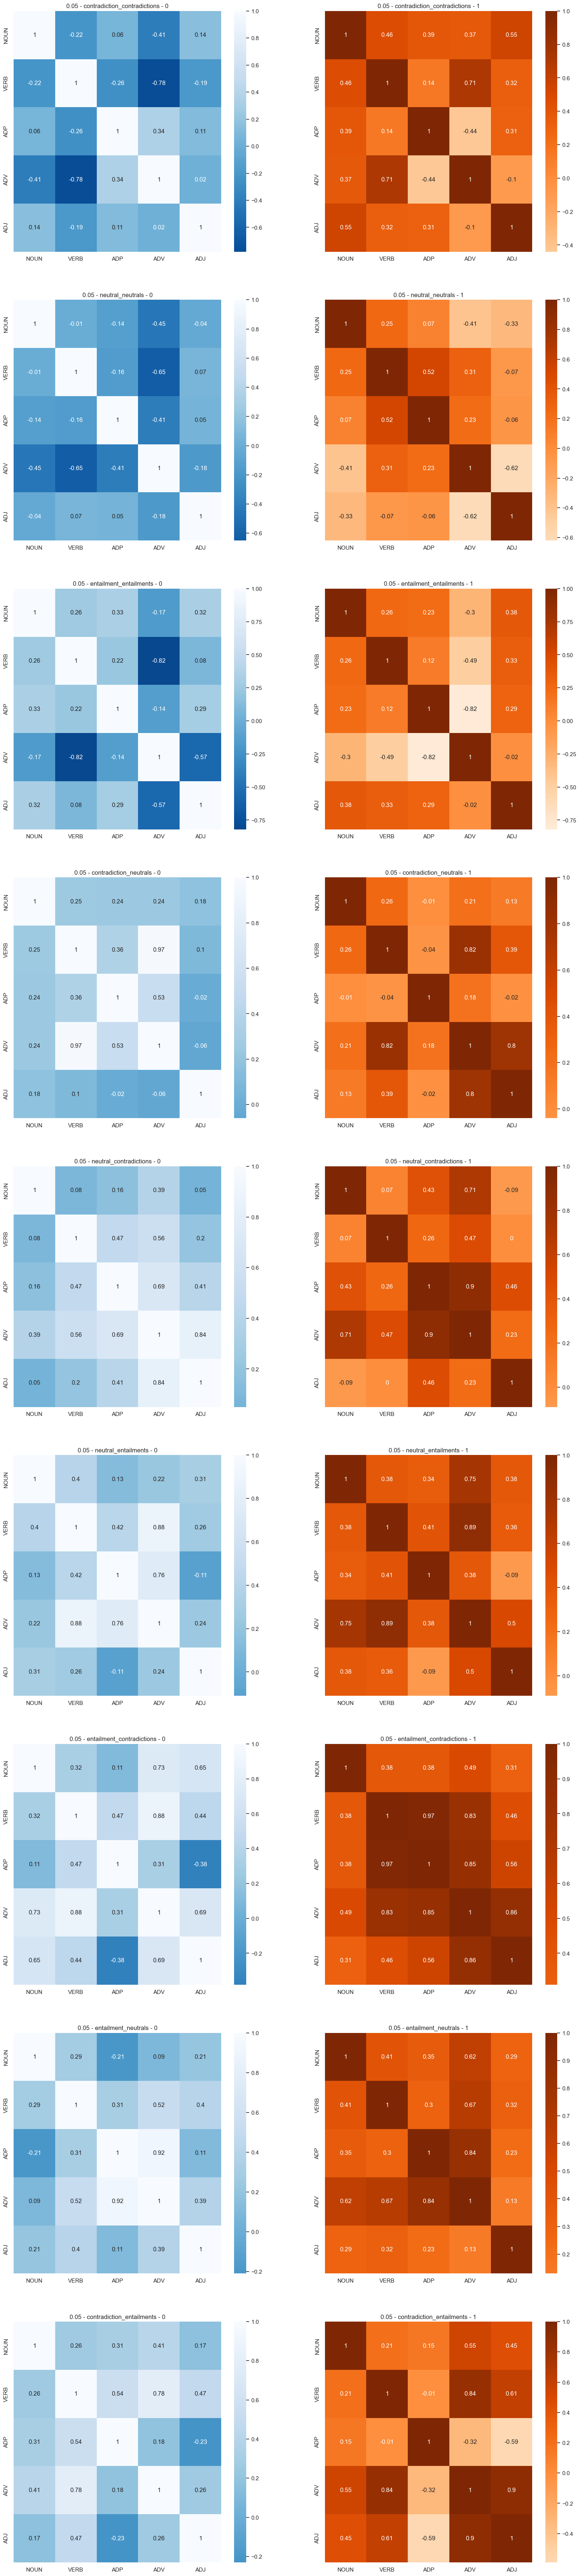

In [57]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i].corr().round(2), center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1].corr().round(2), center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [58]:
print(lista_mapas[2].corr().round(2))
print(lista_nombres[2])

      NOUN  VERB   ADP   ADV   ADJ
NOUN  1.00 -0.01 -0.14 -0.45 -0.04
VERB -0.01  1.00 -0.16 -0.65  0.07
ADP  -0.14 -0.16  1.00 -0.41  0.05
ADV  -0.45 -0.65 -0.41  1.00 -0.18
ADJ  -0.04  0.07  0.05 -0.18  1.00
0.05 - neutral_neutrals - 0


<AxesSubplot:>

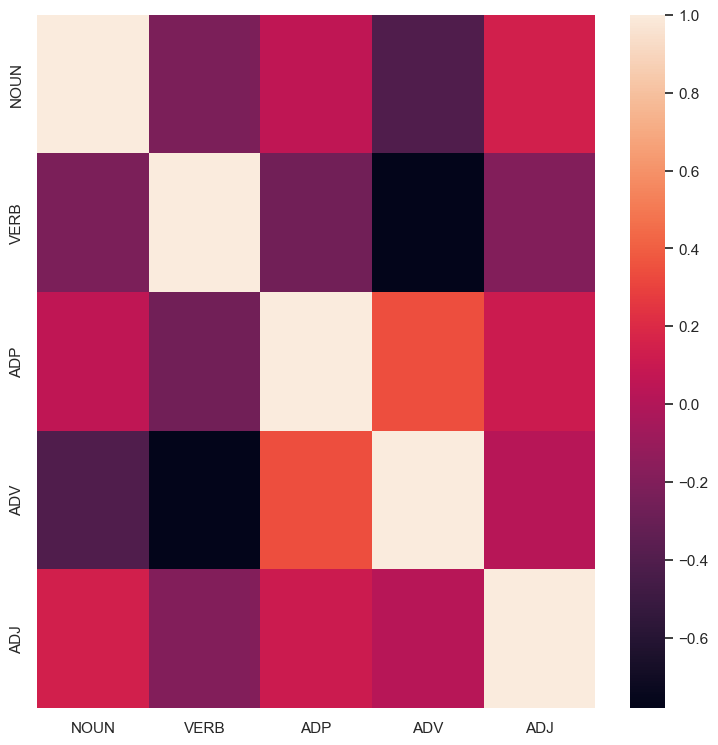

In [59]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[0].corr().round(2))

<AxesSubplot:>

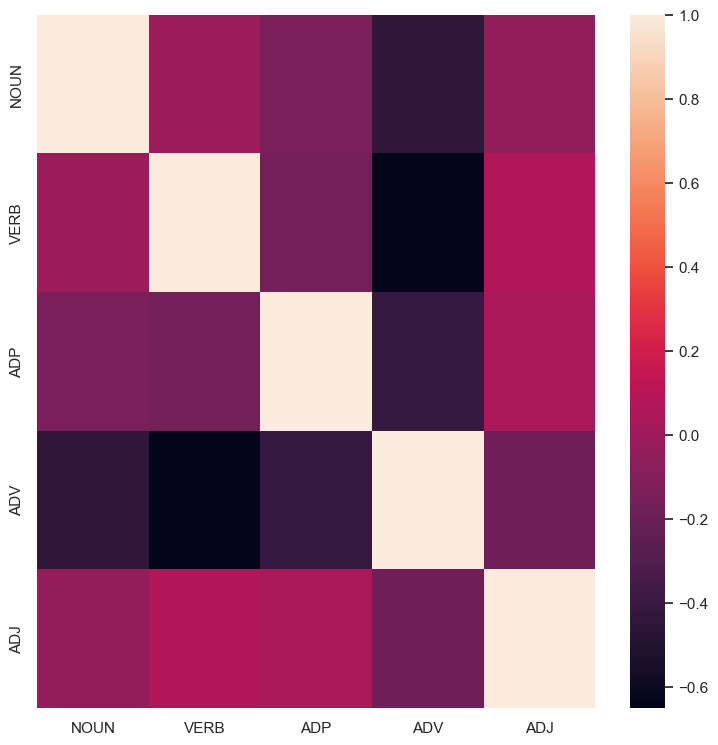

In [60]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[2].corr().round(2))

In [61]:
import stat

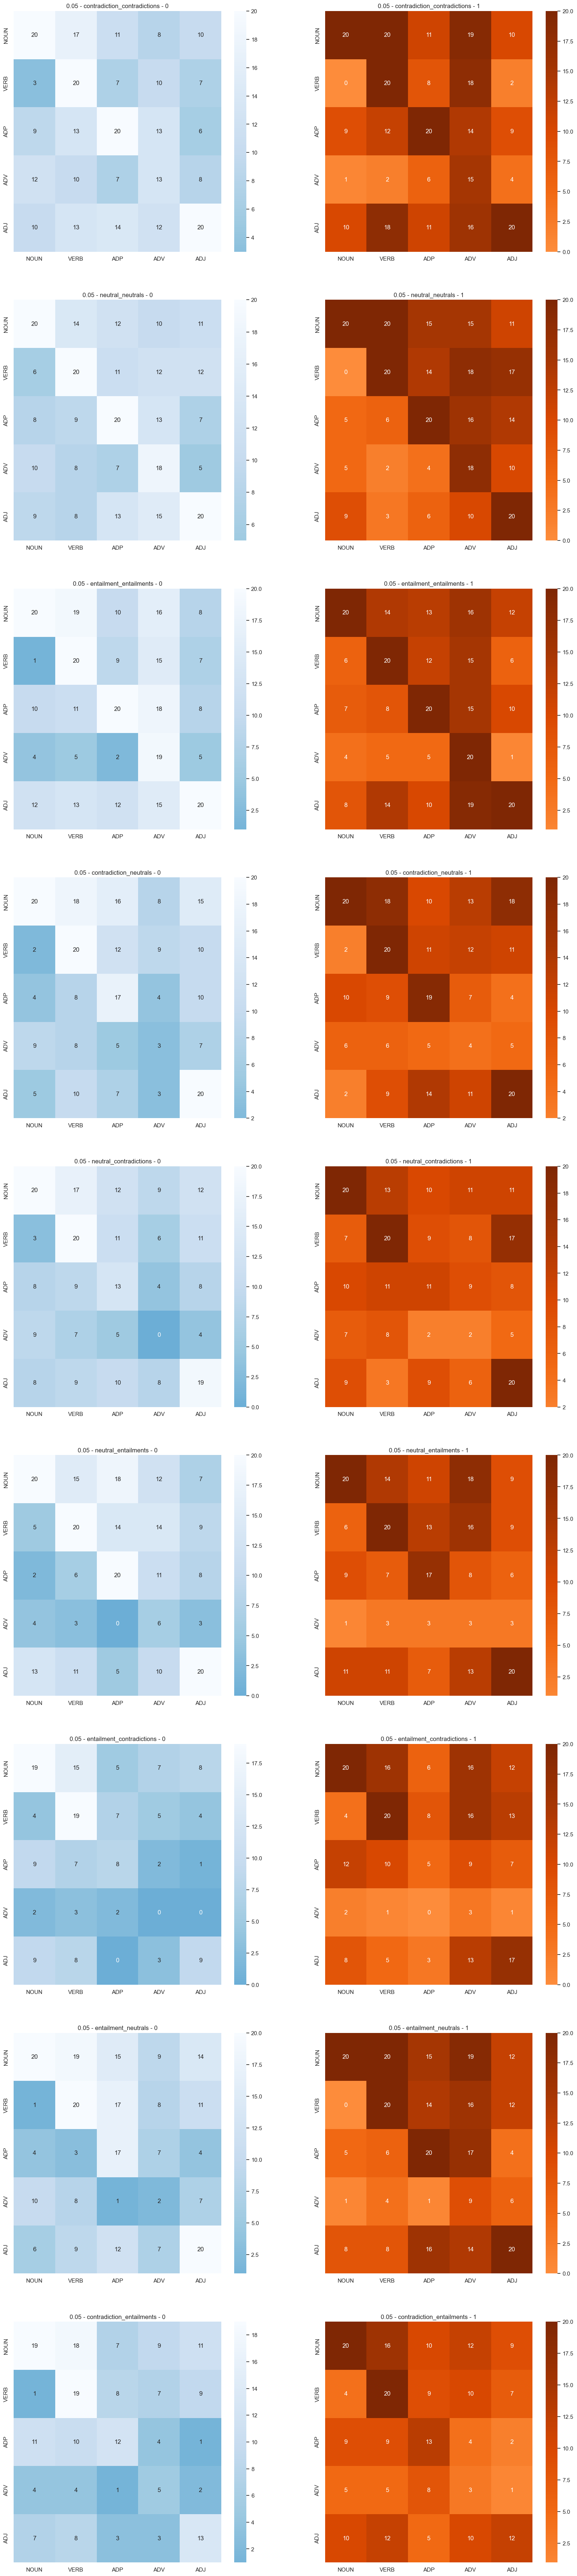

In [62]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

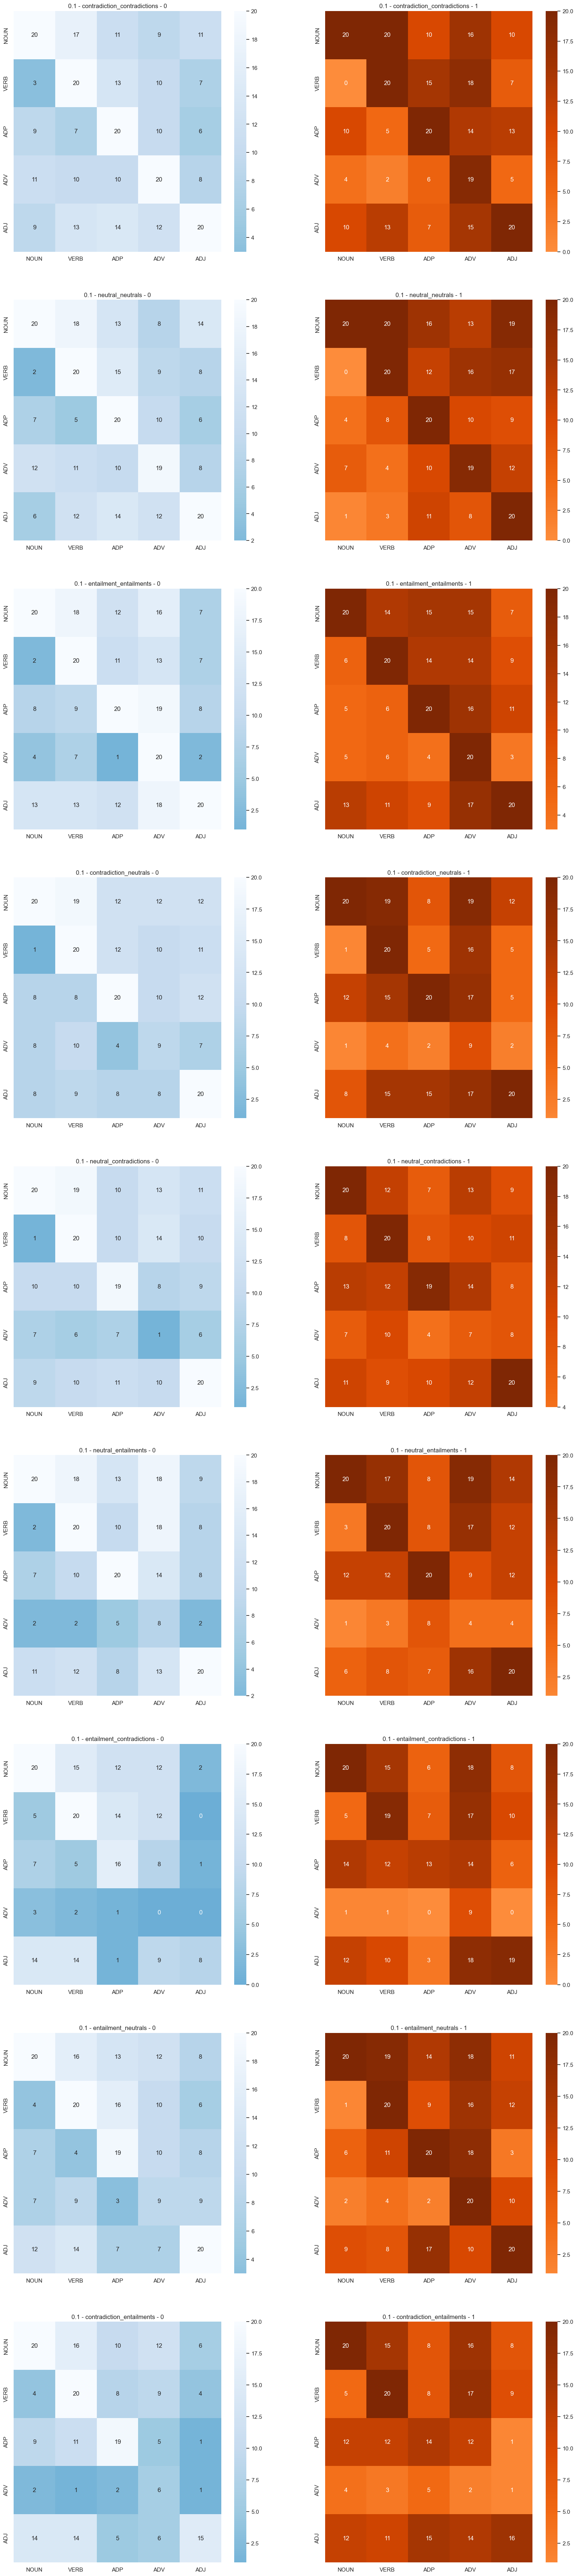

In [63]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(18,36,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

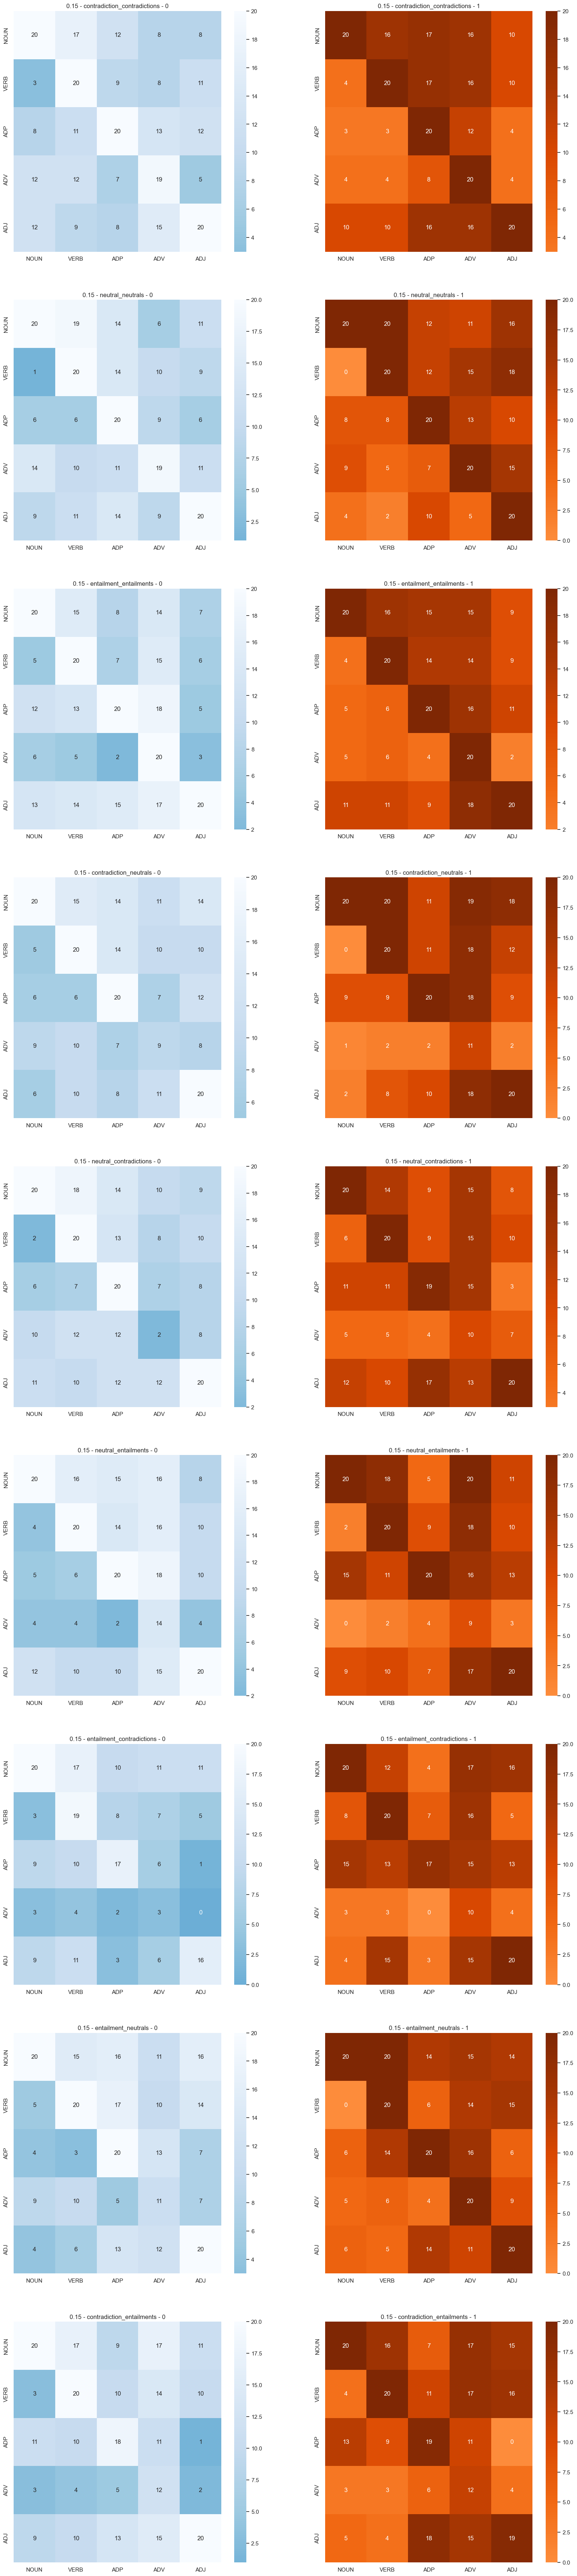

In [64]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(36,54,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

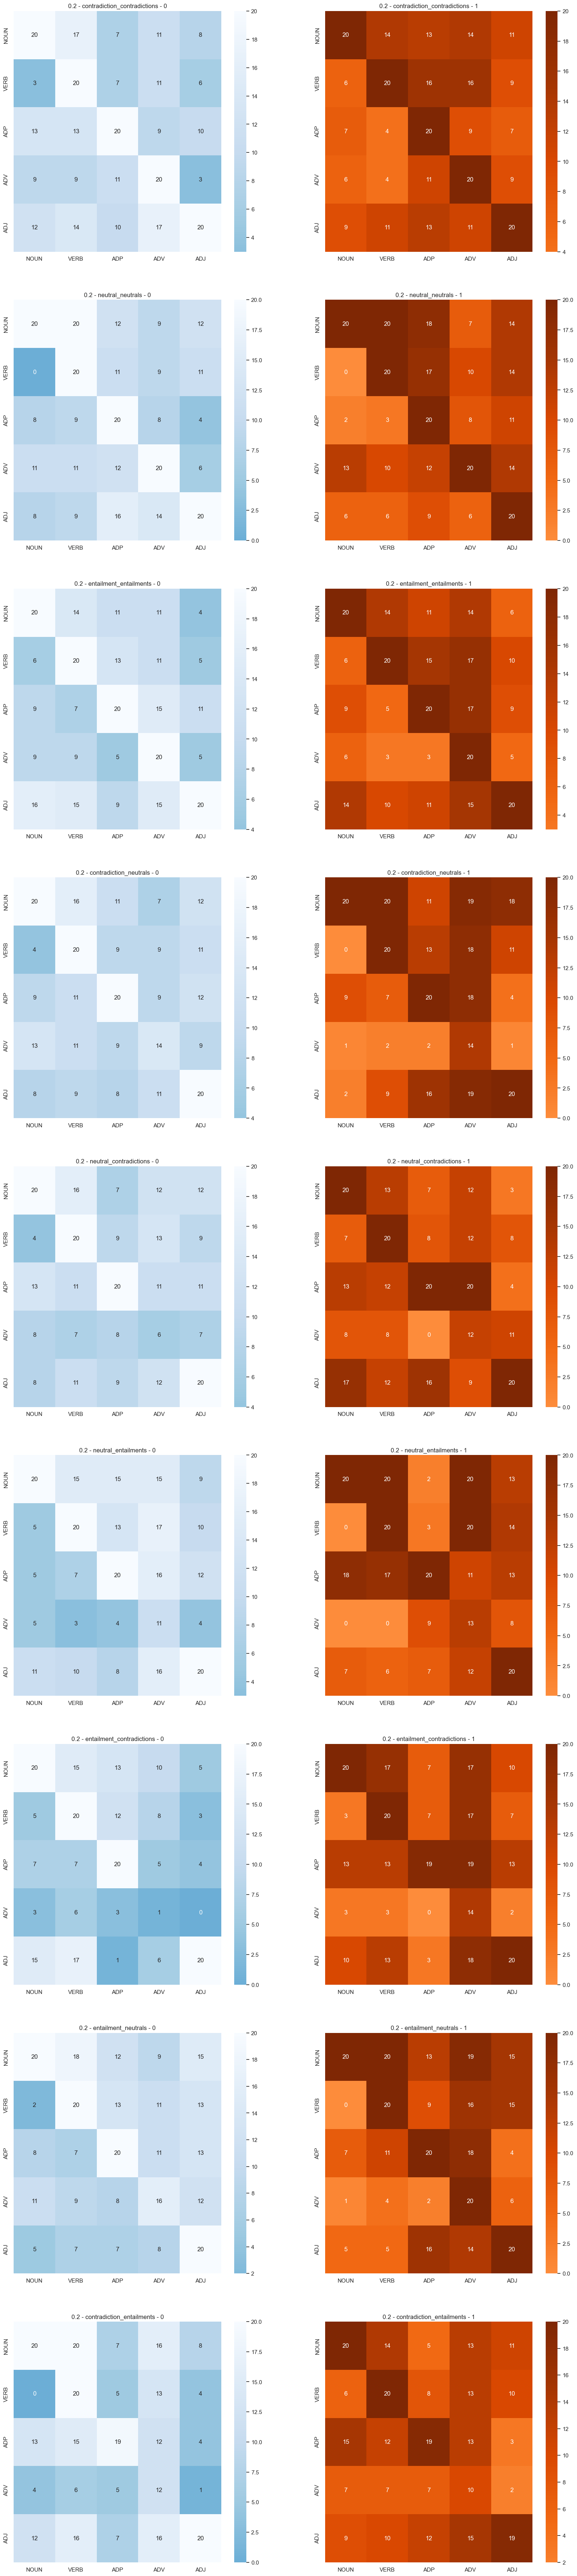

In [65]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(54,72,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

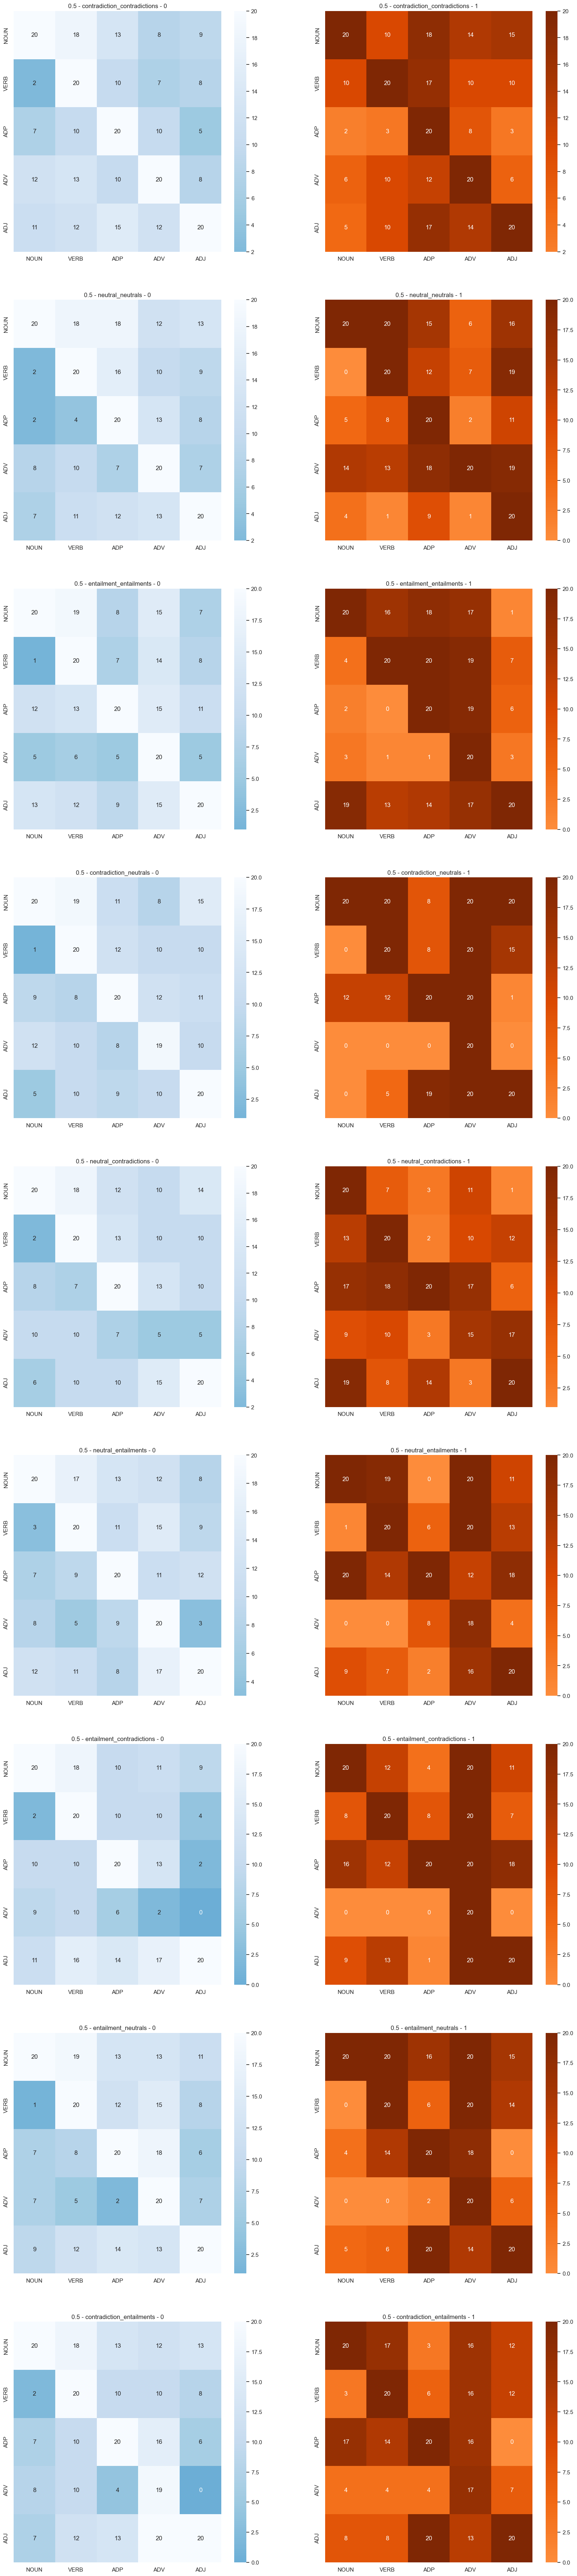

In [66]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(72,90,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

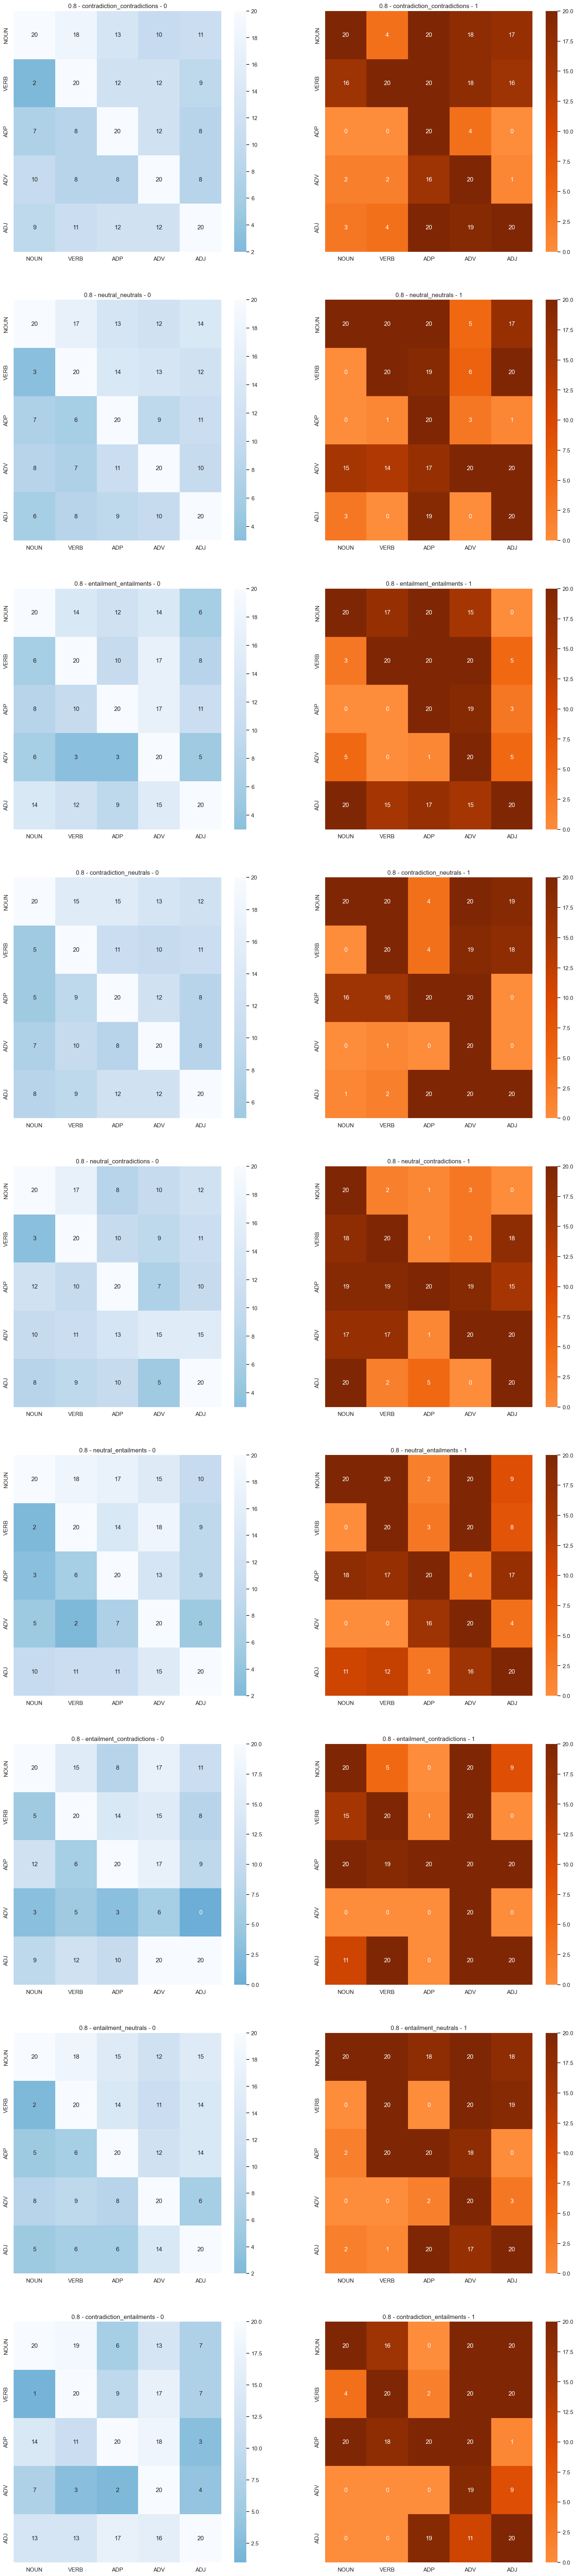

In [67]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(90,108,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

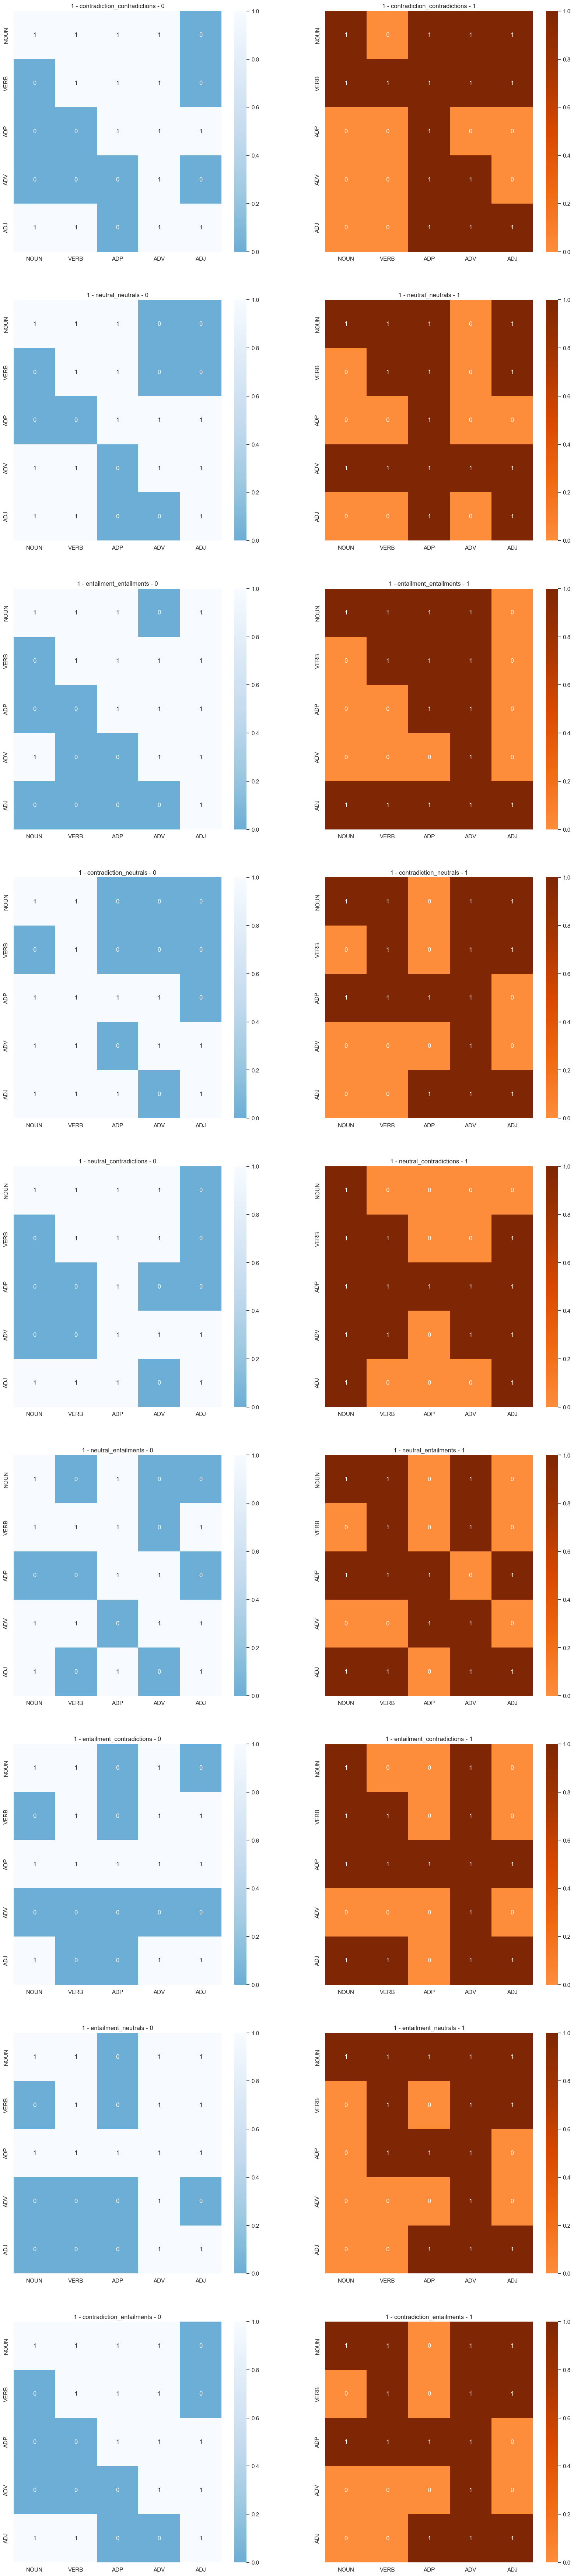

In [68]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(108,126,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [69]:
lista_mapas[108]

NOUN  VERB  ADP  ADV  ADJ
NOUN     1     1    1    1    0
VERB     0     1    1    1    0
ADP      0     0    1    1    1
ADV      0     0    0    1    0
ADJ      1     1    0    1    1